Dataset available here: https://www.kaggle.com/xhlulu/panda-resized-train-data-512x512

In [1]:
import os, gc, subprocess, time

import scipy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import cv2
#from tqdm import tqdm
from tqdm.notebook import tqdm
import skimage.io
from skimage.transform import resize, rescale
from math import sqrt
import statistics
from glob import glob

In [2]:
import PIL.Image
#PIL.Image.MAX_IMAGE_PIXELS = 400000000
PIL.Image.MAX_IMAGE_PIXELS = None

In [3]:
%matplotlib inline

In [4]:
from panda_bvv_config import *

In [5]:
test_cnn_labels.shape

(1216, 5)

In [19]:
gl_class_labels[:4]

,image_id,data_provider,isup_grade,gleason_score,gl_id
0,0005f7aaab2800f6170c399693a96917,karolinska,0,0,gs0/0005f7aaab2800f6170c399693a96917
1,000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0,gs0/000920ad0b612851f8e01bcc880d9b3d
2,0018ae58b01bdadc8e347995b69f99aa,radboud,4,4,gs4/0018ae58b01bdadc8e347995b69f99aa
3,001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4,gs4/001c62abd11fa4b57bf7a6c603a11bb9


In [7]:
gl_class_labels.shape

(11951, 5)

In [8]:
new_col = ['gs'+str(gl_class_labels.gleason_score[i])+'/'+gl_class_labels.image_id[i] for i in range(gl_class_labels.shape[0])]

In [9]:
new_col[11935]

'gs4/fe354e2b6f25e4f4110aed552eb55fc5'

In [10]:
gl_class_labels['gl_id'] = new_col 
gl_class_labels[30:35]

,image_id,data_provider,isup_grade,gleason_score,gl_id
30,00c46b336b5b06423fcdec1b4d5bee06,radboud,1,3,gs3/00c46b336b5b06423fcdec1b4d5bee06
31,00c52cb4db1c7a5811a8f070a910c038,radboud,5,4,gs4/00c52cb4db1c7a5811a8f070a910c038
32,00ca0c23961b5510be46c917be11c43e,radboud,5,5,gs5/00ca0c23961b5510be46c917be11c43e
33,00d8a8c04886379e266406fdeff81c45,radboud,5,4,gs4/00d8a8c04886379e266406fdeff81c45
34,00e6511435645e50673991768a713c66,radboud,1,3,gs3/00e6511435645e50673991768a713c66


In [11]:
#gl_class_labels.to_csv(os.path.join(base_path, 'gl_class.csv'), index_label=False)

In [12]:
id_label_map_gl_class = {k:v for k,v in zip(gl_class_labels.gl_id.values,\
                                           gl_class_labels.gleason_score.values)}

In [13]:
from glob import glob
from_folder_train = valid_cnn
list_files = glob(from_folder_train + '/*/*.png', recursive = True)

In [14]:
id_label_map_gl_class

{'gs0/0005f7aaab2800f6170c399693a96917': 0,
 'gs0/000920ad0b612851f8e01bcc880d9b3d': 0,
 'gs4/0018ae58b01bdadc8e347995b69f99aa': 4,
 'gs4/001c62abd11fa4b57bf7a6c603a11bb9': 4,
 'gs0/001d865e65ef5d2579c190a0e0350d8f': 0,
 'gs0/002a4db09dad406c85505a00fb6f6144': 0,
 'gs3/003046e27c8ead3e3db155780dc5498e': 3,
 'gs3/0032bfa835ce0f43a92ae0bbab6871cb': 3,
 'gs3/003a91841da04a5a31f808fb5c21538a': 3,
 'gs3/003d4dd6bd61221ebc0bfb9350db333f': 3,
 'gs0/00412139e6b04d1e1cee8421f38f6e90': 0,
 'gs3/004391d48d58b18156f811087cd38abf': 3,
 'gs3/004dd32d9cd167d9cc31c13b704498af': 3,
 'gs3/004f6b3a66189b4e88b6a01ba19d7d31': 3,
 'gs3/005e66f06bce9c2e49142536caf2f6ee': 3,
 'gs4/0068d4c7529e34fd4c9da863ce01a161': 4,
 'gs0/006f4d8d3556dd21f6424202c2d294a9': 0,
 'gs4/006f6aa35a78965c92fffd1fbd53a058': 4,
 'gs0/007433133235efc27a39f11df6940829': 0,
 'gs4/0076bcb66e46fb485f5ba432b9a1fe8a': 4,
 'gs4/008069b542b0439ed69b194674051964': 4,
 'gs3/008308f099f0c565fbc024ece6b8b08c': 3,
 'gs4/00928370e2dfeb8a507667ef1d

In [29]:
file_path = list_files[8]
file_path 

'/run/media/admin/kagg/panda/validf/gs0/a18dd083ecf438507441cb0d5fc3122e.png'

In [ ]:
file_path.split(os.path.sep)[-2] + '/' + file_path.split(os.path.sep)[-1].replace('.png', '')

In [32]:
id_label_map_gl_class['gs0/436fff2e0e75ea2ef844b57d88d3c212']

KeyError: 'gs0/436fff2e0e75ea2ef844b57d88d3c212'

In [33]:
train_labels.loc[train_labels.image_id == '436fff2e0e75ea2ef844b57d88d3c212']

,image_id,data_provider,isup_grade,gleason_score,PH_size1,PW_size1,PH_size2,PW_size2,PH_mask_size2,PW_mask_size2,PH_mask_size1,PW_mask_size1
2701,436fff2e0e75ea2ef844b57d88d3c212,radboud,5,4+5,5824.0,5632.0,1456.0,1408.0,1456,1408,5824.0,5632.0


In [35]:
gl_class_labels.loc[gl_class_labels.image_id == '436fff2e0e75ea2ef844b57d88d3c212']

,image_id,data_provider,isup_grade,gleason_score,gl_id
2407,436fff2e0e75ea2ef844b57d88d3c212,radboud,5,4,gs4/436fff2e0e75ea2ef844b57d88d3c212
10059,436fff2e0e75ea2ef844b57d88d3c212,radboud,5,5,gs5/436fff2e0e75ea2ef844b57d88d3c212


In [37]:
test_gleason_labels.shape

(1348, 4)

In [38]:
test_gleason_labels.loc[test_gleason_labels.image_id == '436fff2e0e75ea2ef844b57d88d3c212']

,image_id,data_provider,isup_grade,gleason_score
67,436fff2e0e75ea2ef844b57d88d3c212,radboud,5,4
863,436fff2e0e75ea2ef844b57d88d3c212,radboud,5,0


In [30]:
TrDataGen = LightImgAugDataGeneratorMC
train_datagen = TrDataGen(list_files = list_files,
                    id_label_map = id_label_map_gl_class,
                          suffix = True,
                    batch_size = 2,
                    depth = 6,
                    augment=True,
                    shuf = True)

In [31]:
next(train_datagen)[1]

KeyError: 'gs0/436fff2e0e75ea2ef844b57d88d3c212'

In [13]:
len(list_files)

1162

In [68]:
gl_class_labels.gleason_score[35]

3

In [6]:
image_id='00a97615a51ba4c475bdec8505623bf9'
provider = list(train_labels.loc[train_labels.image_id == image_id]['data_provider'])[0]
provider

'karolinska'

In [6]:
train_labels[['image_id','gleason_score']].groupby('gleason_score').count()

,image_id
gleason_score,
0+0,2892
3+3,2666
3+4,1342
3+5,80
4+3,1243
4+4,1126
4+5,849
5+3,43
5+4,248


In [7]:
gleason_labels[['image_id','gleason_score']].groupby('gleason_score').count()

,image_id
gleason_score,
0,2892
3,4374
4,3588
5,1097


In [9]:
train_labels.loc[train_labels.isup_grade == 0][['image_id','gleason_score']].groupby('gleason_score').count()

,image_id
gleason_score,
0+0,2892


In [10]:
train_labels.loc[train_labels.isup_grade == 1][['image_id','gleason_score']].groupby('gleason_score').count()

,image_id
gleason_score,
3+3,2666


In [11]:
train_labels.loc[train_labels.isup_grade == 2][['image_id','gleason_score']].groupby('gleason_score').count()

,image_id
gleason_score,
3+4,1342
4+3,1


In [12]:
train_labels.loc[train_labels.isup_grade == 3][['image_id','gleason_score']].groupby('gleason_score').count()

,image_id
gleason_score,
4+3,1242


In [13]:
train_labels.loc[train_labels.isup_grade == 4][['image_id','gleason_score']].groupby('gleason_score').count()

,image_id
gleason_score,
3+5,80
4+4,1126
5+3,43


In [15]:
train_labels.loc[train_labels.isup_grade == 5][['image_id','gleason_score']].groupby('gleason_score').count()

,image_id
gleason_score,
4+5,849
5+4,248
5+5,127


### Class weights calculation ###

In [38]:
class_weights_dict = {}
for grade in isup_classes:
    class_weights_dict[int(grade)] = (1/6/(train_labels.loc[train_labels.isup_grade == int(grade)][['image_id',\
                    'isup_grade']].groupby('isup_grade').count()['image_id'].values[0])*train_labels.shape[0])\
    .round(5)

In [39]:
class_weights_dict

{0: 0.6118, 1: 0.66367, 2: 1.31745, 3: 1.42458, 4: 1.4166, 5: 1.44553}

In [56]:
class_weights_dict = {}
for grade in gs_classes:
    class_weights_dict[int(grade)] = (1/4/(gl_class_labels.loc[gl_class_labels.gleason_score == int(grade)][['image_id',\
                    'gleason_score']].groupby('gleason_score').count()['image_id'].values[0])*gl_class_labels.shape[0])\
    .round(5)

In [57]:
class_weights_dict

{0: 1.03311, 3: 0.68307, 4: 0.83271, 5: 2.72356}

In [60]:
gl_class_labels.loc[gl_class_labels.gleason_score == 5][['image_id','gleason_score']].groupby('gleason_score').count()

,image_id
gleason_score,
5,1097


In [54]:
gl_class_labels.shape

(11951, 4)

In [ ]:
neg, pos = np.bincount(raw_df['Class'])
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

In [23]:
for i, row in enumerate(train_labels[10:15].iterrows()):
    print(row[1]['gleason_score'].replace('+', '_'))

0_0
3_3
3_3
3_3
3_3


In [22]:
uu = train_labels.loc[15]['gleason_score'].replace('+', '_')
uu

'4_3'

In [151]:
rr = train_labels.loc[train_labels.data_provider == 'karolinska']
rr[['image_id','gleason_score']].groupby('gleason_score').count()

,image_id
gleason_score,
0+0,1925
3+3,1814
3+4,667
3+5,13
4+3,318
4+4,466
4+5,208
5+3,2
5+4,27


In [155]:
rr.shape

(5456, 12)

In [152]:
1925 + 1814 + 466 + 16

4221

In [148]:
kk = train_labels.loc[train_labels.data_provider == 'radboud']
kk[['image_id','gleason_score']].groupby('gleason_score').count()

,image_id
gleason_score,
0+0,967
3+3,852
3+4,675
3+5,67
4+3,925
4+4,660
4+5,641
5+3,41
5+4,221


In [157]:
kk.shape

(5160, 12)

In [150]:
kk.shape[0] + 675 + 67 + 925 +641+41+221

7730

In [160]:
7730 + 4221

11951

In [14]:
Zoom = 2
to_folder = 'gs'
new_tile_size = 114
tile_number = 16

model_folder = 'effnB5'
pred_file = 'ground456simple.npz'

In [16]:
# wrapping for inputs:
to_folder = os.path.join(base_path, to_folder)
if not os.path.exists(to_folder):
    print("[INFO] 'creating {}' directory".format(to_folder))
    os.makedirs(to_folder)

input_folder = test_size2 if Zoom == 2 else test_size1
input_mask_folder = mask_size2 if Zoom == 2 else mask_size1

In [21]:
to_folder

'/run/media/admin/kagg/panda/gs'

In [24]:
def prepare_gs_class_labels(input_df = test_cnn_labels):
    new_df = input_df.copy()
    test_sh = input_df.shape[0]
    for i, row in enumerate(new_df.iterrows()):
        temp_val = row[1]['gleason_score']
        if temp_val in ['0+0', '3+3', '4+4', '5+5']:
            new_df.loc[row[0], 'gleason_score'] = temp_val[0]
        else:        
            if row[1]['data_provider'] == 'karolinska':
                new_df.drop(row[0], axis = 0, inplace = True)
            else:
                new_df.loc[row[0], 'gleason_score'] = temp_val[0]
                vtt = new_df.loc[row[0]].values.tolist()
                vtt[-1] = temp_val[2]
                new_df.loc[test_sh + i] = vtt
    new_df.reset_index(drop = True, inplace = True)
    return new_df

In [9]:
def prepare_gs_score_labels(input_df = test_cnn_labels):
    new_df = input_df.copy()
    for i, row in enumerate(new_df.iterrows()):
        temp_val = row[1]['gleason_score']
        if temp_val == '0+0': new_df.loc[row[0], 'gleason_score'] = 0
        elif temp_val == '3+3': new_df.loc[row[0], 'gleason_score'] = 1
        elif temp_val == '3+4': new_df.loc[row[0], 'gleason_score'] = 2
        elif temp_val == '3+5': new_df.loc[row[0], 'gleason_score'] = 3
        elif temp_val == '4+3': new_df.loc[row[0], 'gleason_score'] = 4
        elif temp_val == '4+4': new_df.loc[row[0], 'gleason_score'] = 5
        elif temp_val == '4+5': new_df.loc[row[0], 'gleason_score'] = 6
        elif temp_val == '5+4': new_df.loc[row[0], 'gleason_score'] = 7
        elif temp_val == '5+5': new_df.loc[row[0], 'gleason_score'] = 8
        elif temp_val == 'negative': new_df.loc[row[0], 'gleason_score'] = 0
    return new_df

In [5]:
gl_score_labels[['image_id','gleason_score']].groupby('gleason_score').count()

,image_id
gleason_score,
0+0,1925
3+3,2666
3+4,1342
3+5,123
4+3,1243
4+4,1126
4+5,849
5+4,248
5+5,127


In [10]:
tt = prepare_gs_score_labels(input_df = gl_score_labels)

In [35]:
tt[['image_id','gleason_score']].groupby('gleason_score').count()

,image_id
gleason_score,
0,2892
1,2666
2,1342
3,123
4,1243
5,1126
6,849
7,248
8,127


In [17]:
tt.shape

(10616, 4)

In [33]:
bb = []
j = tt.gleason_score.unique()
for i,aa in enumerate(tt.gleason_score.unique()):
    print(aa)
    bb.extend(tt.loc[tt.gleason_score == j[i]][['image_id','gleason_score']].\
              groupby('gleason_score').count()['image_id']/tt.shape[0])

0
5
1
4
6
2
7
8
3


In [34]:
j

array([0, 5, 1, 4, 6, 2, 7, 8, 3], dtype=object)

In [31]:
print(bb)

[0.2724189902034665, 0.1060663149962321, 0.25113036925395626, 0.11708741522230595, 0.07997362471740768, 0.12641296156744536, 0.023360964581763375, 0.01196307460437076, 0.011586284853051998]


In [36]:
train_labels[['image_id','isup_grade']].groupby('isup_grade').count()

,image_id
isup_grade,
0,2892
1,2666
2,1343
3,1242
4,1249
5,1224


In [39]:
bb = []
j = train_labels.isup_grade.unique()
for i,aa in enumerate(train_labels.isup_grade.unique()):
    print(aa)
    bb.extend(train_labels.loc[train_labels.isup_grade == j[i]][['image_id','isup_grade']].\
              groupby('isup_grade').count()['image_id']/train_labels.shape[0])

0
4
1
3
5
2


In [40]:
bb

[0.2724189902034665,
 0.1176525998492841,
 0.25113036925395626,
 0.11699321778447626,
 0.11529766390354182,
 0.12650715900527507]

In [20]:
tt = train_labels.drop(['PH_size1', 'PW_size1', 'PH_size2', 'PW_size2', 'PH_mask_size2', 'PW_mask_size2', 'PH_mask_size1', 'PW_mask_size1'], axis = 1)

In [21]:
tt.head()

,image_id,data_provider,isup_grade,gleason_score
0,0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
1,000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0
2,0018ae58b01bdadc8e347995b69f99aa,radboud,4,4+4
3,001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4+4
4,001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0+0


In [25]:
gs_labels = prepare_gs_labels(tt)
gs_labels.shape

(11951, 4)

In [15]:
np.array(train_labels[:5])

array([['0005f7aaab2800f6170c399693a96917', 'karolinska', 0, '0+0',
        7360.0, 6912.0, 1840.0, 1728.0, 1840, 1728, 7360.0, 6912.0],
       ['000920ad0b612851f8e01bcc880d9b3d', 'karolinska', 0, '0+0',
        3840.0, 3328.0, 960.0, 832.0, 960, 832, 3840.0, 3328.0],
       ['0018ae58b01bdadc8e347995b69f99aa', 'radboud', 4, '4+4', 6336.0,
        1472.0, 1584.0, 368.0, 1584, 368, 6336.0, 1472.0],
       ['001c62abd11fa4b57bf7a6c603a11bb9', 'karolinska', 4, '4+4',
        7166.0, 5976.0, 1791.0, 1494.0, 1791, 1494, 7166.0, 5976.0],
       ['001d865e65ef5d2579c190a0e0350d8f', 'karolinska', 0, '0+0',
        8640.0, 7168.0, 2160.0, 1792.0, 2160, 1792, 8640.0, 7168.0]],
      dtype=object)

In [7]:
test_cnn_labels['im'] = test_cnn_labels['image_id']+'.png'

In [10]:

test_cnn_labels.to_csv(os.path.join(base_path, 'test_cnn_labels.csv'), index_label=False)


In [12]:

tt.to_csv(os.path.join(base_path, 'gl_score.csv'), index_label=False)

In [27]:
gs_labels.tail()

,image_id,data_provider,isup_grade,gleason_score
11946,ffac6d538449832cbecba2c4f4908dfa,radboud,3,3
11947,ffc70bf605de30aaa936533397a29d9c,radboud,5,5
11948,ffcbb41626c9267c5c20c4804bd5639a,radboud,4,5
11949,ffdc59cd580a1468eac0e6a32dd1ff2d,radboud,5,5
11950,ffe236a25d4cbed59438220799920749,radboud,2,4


In [46]:
#this is a traditional write down function:
def datanew_wr(output_data_path_, img_num_, data_new_):
    cv2.imwrite(os.path.join(output_data_path_, img_num_ + '_1_' + '.png'), data_new_)

In [69]:
#we write to foldersbased on gleason score
def datanew_wr_gleason(output_data_path_, 
                       img_num_, 
                       data_new_,
                       gleason_class):
    wr_to = os.path.join(output_data_path_, 'gs' + gleason_class, img_num_ + '.png')    
    cv2.imwrite(wr_to, data_new_)


In [111]:
#wrapper for image processing function
def process_all_images(proc_func):
    
    def wrapper(zoom = Zoom,
                input_biopsy_folder = input_folder,
                output_data_path = gleason_path,
                df_name = test_gleason_labels[:6],
                tif_file = False,
                with_mask = False,
                input_mask_folder = input_mask_folder,
                **kw):
        print(input_biopsy_folder)
        print(to_folder)
        with tqdm(total=df_name.shape[0]) as pbar:
            for  i, row in enumerate(tqdm(df_name.iterrows())):
                img_num = row[1]['image_id']
                provider = row[1]['data_provider']                         
                mask = None
                if tif_file:
                    try:
                        biopsy = skimage.io.MultiImage(os.path.join(input_biopsy_folder,
                                                                    img_num + '.tiff'))[zoom]               
                    except:
                        print('Failed to read tiff:', img_num)                        
                else:
                    try:
                        biopsy = skimage.io.imread(os.path.join(input_biopsy_folder, img_num + '.png'))
                        shape = biopsy.shape
                        if shape[0]<shape[1]: 
                            biopsy = np.rot90(biopsy)
                            shape = biopsy.shape 
                    except:
                        print(f'can not proceed with {img_num}')   
                if with_mask:
                    try:
                        mask = skimage.io.imread(os.path.join(input_mask_folder, img_num + '_mask.png'))
                        shape = mask.shape
                        if shape[0]<shape[1]: 
                            mask = np.rot90(mask)
                            shape = mask.shape 
                    except:
                        print('Failed to process mask:', img_num) 
                try: 
                    data_new = proc_func(biopsy, 
                                         mask, 
                                         provider,
                                         row[1]['gleason_score'],
                                         **kw)
                    datanew_wr_gleason(output_data_path_= output_data_path,
                                       img_num_ = img_num, 
                                       data_new_ = data_new,
                                       gleason_class = str(row[1]['gleason_score']))                    
                    #datanew_wr(output_data_path_= output_data_path, img_num_ = img_num, data_new_ = data_new)                    
                except Exception as ee:
                    print('Processing mistake:\n', ee, '\n', img_num)            
                try:
                    del biopsy, mask, data_new, mask_new
                except:
                    pass
                pbar.update(1)
            gc.collect()
        return
    
    return wrapper

In [68]:
for grade in gs_classes:
    os.mkdir(os.path.join(gleason_path, f'gs{grade}'))


In [117]:
def display_mask(img_num, chan = 2):
    i=3
    f, ax = plt.subplots(1, 3, figsize=(8,10))
    image_path = os.path.join(mask_size2, img_num + "_mask.png")
    mask_data = skimage.io.imread(image_path)        
    cmap = matplotlib.colors.ListedColormap(['black', 'lightgray', 'darkgreen', 'yellow', 'orange', 'red'])
    ax[i%3].imshow(np.asarray(mask_data)[:,:,chan], cmap=cmap, interpolation='nearest', vmin=0, vmax=5)      
    ax[i%3].axis('off')
    ax[i%3].axis('off')
            
    plt.show()

In [110]:
def change_karolinska_mask_for_isup_grade_direct(mask_data, chan):
    """
    This function returns pre-processed radbound mask for image multiplication
    """

    try:
        new_mask = np.zeros(mask_data.shape)#.astype('uint8')
        cancerous_tissue = False
        try:             
            mask_area = np.where(mask_data[:,:,chan] == 2)
            new_mask[mask_area[0], mask_area[1], :] = [1, 1, 1] 
            del mask_area, mask_data
            if new_mask.any() >0: 
                cancerous_tissue = True    
        except Exception as ee:
            print("Mask {%s} processing mistake: " %mask_image, ee)
    except Exception as ee:
        print("Mask {%s} read mistake: "  %mask_image, str(ee))

    gc.collect()                   
    
    return cancerous_tissue, new_mask

In [32]:
def change_radboud_mask_for_isup_grade_direct(mask_data, chan,
                                      gauss_bl = 10):
    """
    This function returns pre-processed radbound mask for image multiplication
    """

    try:
        new_mask = np.zeros(mask_data.shape)#.astype('uint8')
        cancerous_tissue = False
        try: 
            for area_value in range(3,5):
                mask_area = np.where(mask_data[:,:,chan] == area_value)
                new_mask[mask_area[0], mask_area[1], :] = [1, 1, 1]
                del mask_area
            if new_mask.any() >0: 
                cancerous_tissue = True
            del mask_data,    
        except Exception as ee:
            print("Mask {%s} processing mistake: " %mask_image, ee)
    except Exception as ee:
        print("Mask {%s} read mistake: "  %mask_image, str(ee))
        
    #new_mask[:,:,:] = cv2.blur(new_mask[:,:, :],(gauss_bl,gauss_bl))
    new_mask[:,:,:] = cv2.bilateralFilter(np.float32(new_mask[:,:,:]),gauss_bl,25,25)
    #medianBlur(new_mask[:,:, 2],5)
    #new_mask[:,:,:] = cv2.GaussianBlur(new_mask[:,:,:],(gauss_bl,gauss_bl), 0)
    #new_mask[:,:,:] =  np.rint(new_mask[:,:,:]) #.astype(int) 
    new_mask[:,:,:] =  np.ceil(new_mask[:,:,:]) #.astype(int) 
    #gc.collect()                   
    
    return cancerous_tissue, new_mask

In [112]:
def change_radboud_mask_for_gleason_grade_direct(mask_data, 
                                                 chan,
                                                 gleason_class,
                                                 gauss_bl = 10):
    """
    This function returns pre-processed radbound mask for image multiplication
    """
    cancerous_tissue = False
    if gleason_class == 0: 
        new_mask = mask_data
        
    else:
        try:
            new_mask = np.zeros(mask_data.shape)#.astype('uint8')
            try: 
                mask_area = np.where(mask_data[:,:,chan] == gleason_class)
                new_mask[mask_area[0], mask_area[1], :] = [1, 1, 1]
                del mask_area
                if new_mask.any() >0: 
                    cancerous_tissue = True
                del mask_data,    
            except Exception as ee:
                print("Mask {%s} processing mistake: " %mask_image, ee)
        except Exception as ee:
            print("Mask {%s} read mistake: "  %mask_image, str(ee))

        #new_mask[:,:,:] = cv2.blur(new_mask[:,:, :],(gauss_bl,gauss_bl))
        new_mask[:,:,:] = cv2.bilateralFilter(np.float32(new_mask[:,:,:]),gauss_bl,25,25)
        #medianBlur(new_mask[:,:, 2],5)
        #new_mask[:,:,:] = cv2.GaussianBlur(new_mask[:,:,:],(gauss_bl,gauss_bl), 0)
        #new_mask[:,:,:] =  np.rint(new_mask[:,:,:]) #.astype(int) 
        new_mask[:,:,:] =  np.ceil(new_mask[:,:,:]) #.astype(int) 
        #gc.collect()                   
    
    return cancerous_tissue, new_mask

In [73]:
def get_cancer_area_from_mask(cancer_mask, biopsy):
    """
    Returns multiplication of mask and image
    """
    try:
        only_cancer = np.multiply(cancer_mask,biopsy).astype(int)
        #cv2.imwrite(save_path, only_cancer, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
        #del cancer_mask, biopsy #, only_cancer
    except Exception as ee:
        print(str(ee))
    
    return only_cancer  

In [88]:
@process_all_images
def tile16_simple(img, mask, provider, gleason_score, **kw):        
    sz=kw.get('sz') if kw.get('sz') else 32    
    N = kw.get('N') if kw.get('N') else 16
    final_dim = kw.get('final_dim') if kw.get('final_dim') else N**0.5 
    result = []
    shape = img.shape
    pad0,pad1 = (sz - shape[0]%sz)%sz, (sz - shape[1]%sz)%sz
    img = np.pad(img,[[pad0//2,pad0-pad0//2],[pad1//2,pad1-pad1//2],[0,0]],
                constant_values=255)
    img = img.reshape(img.shape[0]//sz,sz,img.shape[1]//sz,sz,3)
    img = img.transpose(0,2,1,3,4).reshape(-1,sz,sz,3)
    if len(img) < N:
        img = np.pad(img,[[0,N-len(img)],[0,0],[0,0],[0,0]],constant_values=255)
    idxs = np.argsort(img.reshape(img.shape[0],-1).sum(-1))[:N]
    img = img[idxs]
    a, b, c, d = img.shape
    data_new = (img.reshape(int(final_dim), int(final_dim),\
                                                    b, c, d).swapaxes(1,2).reshape(b*int(final_dim),\
                                                    c*int(final_dim), d))
    data_new = cv2.bitwise_not(data_new)
    return data_new


In [65]:
kw_for_tile_func = {'sz': 80, 'N':16}
tile16_simple(df_name = test_gleason_labels[:60],
              **kw_for_tile_func)

/run/media/admin/kagg/panda/test_size2
/run/media/admin/kagg/panda/gs


In [34]:
@process_all_images
def get_cancer_area_for_isup_grade(biopsy, 
                                   mask, 
                                   provider, 
                                   gleason_score, 
                                   **kw):
    """
    Extracts cancer area only (if cancerous), from image and mask; or unchanged (if non-cancerous).
    Do NOT split cancer areas on Gleason.
    This function applicable for ISUP-grade based training
    Do NOT tile image
    """
    
    gauss_bl = kw.get('gauss_bl') if kw.get('gauss_bl') else 20    
    channel = 0 if len(np.unique(mask[:,:,0])) >1 else 2    
              
    if provider == 'karolinska':
        cancerous, new_mask  = change_karolinska_mask_for_isup_grade_direct(mask, chan = channel)
    elif provider == 'radboud':
        cancerous, new_mask  = change_radboud_mask_for_isup_grade_direct(mask, chan = channel,
                                      gauss_bl = gauss_bl)
    if cancerous:
        temp_im = get_cancer_area_from_mask(new_mask, biopsy)
        temp_im = temp_im.astype('uint8') * 255
        inv = cv2.bitwise_not(temp_im )
        #inv = biopsy
    else:
        inv = biopsy
    
    data_new = cv2.bitwise_not(inv)
    return data_new
    
    #eliminate_white_direct(biopsy = inv,
    #                       save_file_name = save_path,
    #                       zoom =2,                          
    #                     fault_name = 'faults_size2_large_mask.txt', 
    #                      tile_square_yside = tile_square_yside,
    #                        tile_square_xside = tile_square_xside, 
    #                      tile_fill = tile_fill,
    #                      threshold = threshold,
    #                          transform_ratios = transform_ratios,
    #                    file_list = None,                         
    #                      compression = compression)
        
    #cv2.imwrite(save_path, inv, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
    #else:
        #execute_cp_command(biopsy_file_path, save_path)

In [113]:
@process_all_images
def get_cancer_area_for_gleason_grade(biopsy, 
                                   mask, 
                                   provider, 
                                   gleason_class, 
                                   **kw):
    """
    Extracts cancer area only (if cancerous), from image and mask; or unchanged (if non-cancerous).
    Split cancer areas on Gleason.
    Do NOT tile image
    """

    gauss_bl = kw.get('gauss_bl') if kw.get('gauss_bl') else 20    
    channel = 0 if len(np.unique(mask[:,:,0])) >1 else 2    

    if provider == 'karolinska':
        cancerous, new_mask  = change_karolinska_mask_for_isup_grade_direct(mask, chan = channel)
    elif provider == 'radboud':
        cancerous, new_mask  = change_radboud_mask_for_gleason_grade_direct(mask, 
                                                                            chan = channel,
                                                                            gleason_class=gleason_class,
                                                                           gauss_bl = gauss_bl)

    if cancerous:
        temp_im = get_cancer_area_from_mask(new_mask, biopsy)
        temp_im = temp_im.astype('uint8') * 255
        inv = cv2.bitwise_not(temp_im )
        #inv = biopsy
    else:
        inv = biopsy
    
    data_new = cv2.bitwise_not(inv)
    return data_new

In [114]:
kw_for_tile_func = {'gauss_blur':20}
get_cancer_area_for_gleason_grade(df_name = test_gleason_labels[:10],
                                  with_mask = True,
                                  **kw_for_tile_func)

/run/media/admin/kagg/panda/test_size2
/run/media/admin/kagg/panda/gs


rabbit 4
rabbit 4
rabbit 4
rabbit 4
rabbit 5
rabbit 3
rabbit 4




In [115]:
test_cnn_labels[:10]

,image_id,data_provider,isup_grade,gleason_score
0,d3a5775345ddc4976944ff1941709ef0,karolinska,0,0
1,e20c73041c5c5ac83c20a7c669f46e9a,radboud,3,4
2,8f8d20fc6e9b6aa3b145e359e104eac4,radboud,3,4
3,6ac2095c7968fa30ab6c5dc7d1ed5121,karolinska,0,0
4,389758c9e3aad00e774d581150f372db,radboud,3,4
5,66f04788a17915feba394290384e13a4,radboud,4,4
6,fd8928cd1f06f33ff00e32f19c58abd3,radboud,5,5
7,dfae643568b01d1f4ad5d86bac2f7994,radboud,2,3
8,fb80c40073a4016bf384f408ec048f55,radboud,3,4
9,b9791f986bcc4f84ca2da793e933c5ac,karolinska,1,3


In [116]:
test_cnn_labels[:10]

,image_id,data_provider,isup_grade,gleason_score
8767,d3a5775345ddc4976944ff1941709ef0,karolinska,0,0+0
9336,e20c73041c5c5ac83c20a7c669f46e9a,radboud,3,4+3
5848,8f8d20fc6e9b6aa3b145e359e104eac4,radboud,3,4+3
4296,6ac2095c7968fa30ab6c5dc7d1ed5121,karolinska,0,0+0
2267,389758c9e3aad00e774d581150f372db,radboud,3,4+3
4147,66f04788a17915feba394290384e13a4,radboud,4,4+4
419,0abc61a1bc7abe47b9e44a9f69979eb0,karolinska,2,3+4
10507,fd8928cd1f06f33ff00e32f19c58abd3,radboud,5,5+4
9248,dfae643568b01d1f4ad5d86bac2f7994,radboud,2,3+4
10410,fb80c40073a4016bf384f408ec048f55,radboud,3,4+3


In [20]:
test_cnn_labels = pd.read_csv(os.path.join(base_path, 'test_cnn_labels.csv'))
test_cnn_labels[:3]

,image_id,data_provider,isup_grade,gleason_score
8767,d3a5775345ddc4976944ff1941709ef0,karolinska,0,0+0
9336,e20c73041c5c5ac83c20a7c669f46e9a,radboud,3,4+3
5848,8f8d20fc6e9b6aa3b145e359e104eac4,radboud,3,4+3


In [77]:
# %%time
# kw = {'gauss_blur':20}
# get_cancer_area_for_isup_grade(with_mask = True,
#                                df_name = test_cnn_labels,
#                                **kw)

In [62]:
ttt = skimage.io.imread(os.path.join(test_size2, '06ac9e66e78a3eb76259395c7b3ed8dac.png')  )

FileNotFoundError: No such file: '/run/media/admin/kagg/panda/test_size2/06ac9e66e78a3eb76259395c7b3ed8dac.png'

In [72]:
sum(sum(ttt))

array([196, 183,  18], dtype=uint8)

In [18]:
train_labels.loc[train_labels.image_id == '003a91841da04a5a31f808fb5c21538a']

,image_id,data_provider,isup_grade,gleason_score,PH_size1,PW_size1,PH_size2,PW_size2,PH_mask_size2,PW_mask_size2,PH_mask_size1,PW_mask_size1
8,003a91841da04a5a31f808fb5c21538a,karolinska,1,3+3,3984.0,2513.0,996.0,628.0,996,628,3984.0,2513.0


In [131]:
# filename = os.path.join(test_size2, '003a91841da04a5a31f808fb5c21538a.png')
# biopsy = skimage.io.imread(filename)     
# skimage.io.imshow(biopsy) #[600:900, 1600:2500])

In [129]:
train_labels[:10]

,image_id,data_provider,isup_grade,gleason_score,PH_size1,PW_size1,PH_size2,PW_size2,PH_mask_size2,PW_mask_size2,PH_mask_size1,PW_mask_size1
0,0005f7aaab2800f6170c399693a96917,karolinska,0,0+0,7360.0,6912.0,1840.0,1728.0,1840,1728,7360.0,6912.0
1,000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0,3840.0,3328.0,960.0,832.0,960,832,3840.0,3328.0
2,0018ae58b01bdadc8e347995b69f99aa,radboud,4,4+4,6336.0,1472.0,1584.0,368.0,1584,368,6336.0,1472.0
3,001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4+4,7166.0,5976.0,1791.0,1494.0,1791,1494,7166.0,5976.0
4,001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0+0,8640.0,7168.0,2160.0,1792.0,2160,1792,8640.0,7168.0
5,002a4db09dad406c85505a00fb6f6144,karolinska,0,0+0,8193.0,5976.0,2048.0,1494.0,2048,1494,8193.0,5976.0
6,003046e27c8ead3e3db155780dc5498e,karolinska,1,3+3,8256.0,5888.0,2064.0,1472.0,2064,1472,8256.0,5888.0
7,0032bfa835ce0f43a92ae0bbab6871cb,karolinska,1,3+3,7025.0,5976.0,1756.0,1494.0,1756,1494,7025.0,5976.0
8,003a91841da04a5a31f808fb5c21538a,karolinska,1,3+3,3984.0,2513.0,996.0,628.0,996,628,3984.0,2513.0
9,003d4dd6bd61221ebc0bfb9350db333f,karolinska,1,3+3,7936.0,5632.0,1984.0,1408.0,1984,1408,7936.0,5632.0


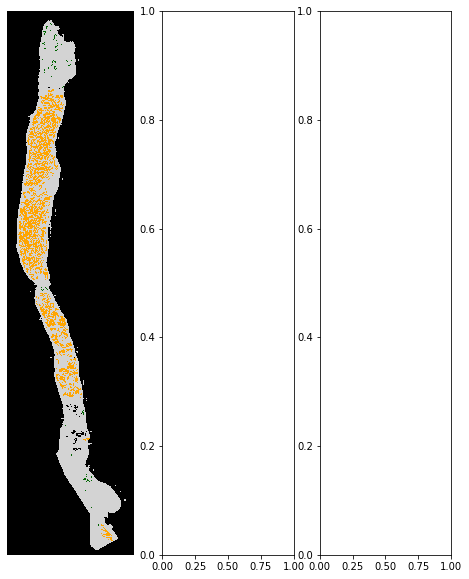

In [130]:
display_mask('0018ae58b01bdadc8e347995b69f99aa', 2)

In [6]:
def execute_cp_command(ex_file, ex_path):
    bashCommand = "cp " + ex_file + " " + ex_path
    process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
    output, error = process.communicate()
    return output, error

In [6]:
def el_white_area(from_path = train_size2,
                save_fold_name = 'train_nwh_new64x32',
                df_name = size2_labels,
                tile_square_yside = 64, tile_square_xside = 32, 
                tile_fill = 0.5,
                threshold = 241):
    """
    Counts number of tiles and brings back tiled images numpy array (does not write to disk)
    
    """
    column_name = save_fold_name [13:]+'x'+ str(tile_fill)   
    save_fold_name = os.path.join(base_path, save_fold_name)
    fault_files = []
    tiles = []
    
    #constants: 
    etalon_field_value = tile_square_yside*tile_square_xside*255
     
    #iterate on all files in a fold:
    for  i, row in enumerate(tqdm(df_name.iterrows())):
        try:
            file_name = row[1]['image_id'] + '.jpg'
            save_path = os.path.join(save_fold_name, file_name)
            #neccesary adds-on:
            nonwhite_image_tiles = [] #add tiles to the array
            nonwhite_image_tiles1 = []
            temp_precip = [] #tiles number to abandon 
            #first,load file with selected zoom:
            biopsy = skimage.io.imread(os.path.join(from_path, file_name))        
            #make mask:
            grey_biopsy = cv2.cvtColor(biopsy, cv2.COLOR_BGR2GRAY)
            #we work with black masks on the white area:
            ret, white_mask = cv2.threshold(grey_biopsy, threshold, 255, 0)
            #calculate adds-on:
            ytiles = grey_biopsy.shape[0]//tile_square_yside
            xtiles = grey_biopsy.shape[1]//tile_square_xside
            tiles_number = xtiles*ytiles

            #collect all tiles with non-white area:
            for i in range(ytiles):
                for j in range(xtiles):
                    coordinates = [i*tile_square_yside, (i+1)*tile_square_yside,\
                                   j*tile_square_xside, (j+1)*tile_square_xside]
                    mask_area = white_mask[coordinates[0]:coordinates[1], coordinates[2]:coordinates[3]]
                    if (etalon_field_value - np.sum(mask_area))/etalon_field_value > tile_fill:
                        nonwhite_image_tiles.append(biopsy[coordinates[0]:coordinates[1],\
                                                              coordinates[2]:coordinates[3]])                        
                    del coordinates, mask_area
            num_tiles = len(nonwhite_image_tiles) 
            tiles.append(np.array(nonwhite_image_tiles))
            df_name.loc[df_name['image_id']==row[1]['image_id'], column_name] = num_tiles
        
        except Exception as ee:
            print(ee)
            fault_files.append(file_name)
            #with open(fault_name,'a') as ff:
            #    ff.write(file_name)
            #   ff.write('\n')
            

        try:
            del biopsy, grey_biopsy
        except:
            pass
        
        gc.collect()     
    
    return fault_files, np.array(tiles)


### 0. View file ###

In [63]:
mask_file = os.path.join(train_size1, '6aa05e4c2cd649f22d309c40540b4230.jpg')
#biopsy = skimage.io.MultiImage(mask_file)[1]
biopsy = skimage.io.imread(mask_file) 
biopsy.shape
#cv2.imwrite(os.path.join(train_size1, '7fff6b6143de8f92c066b3fc8296ffbe' + '.jpg'), biopsy)
#skimage.io.imshow(biopsy) #[600:900, 1600:2500])
#np.unique(biopsy[:,:,2])

(7424, 1856, 3)

### 1. Load dataframe ###

In [88]:
train_labels.head(10)

,image_id,data_provider,isup_grade,gleason_score,PH_size1,PW_size1,PH_size2,PW_size2,PH_mask_size2,PW_mask_size2,PH_mask_size1,PW_mask_size1
0,0005f7aaab2800f6170c399693a96917,karolinska,0,0+0,7360.0,6912.0,1840.0,1728.0,1840,1728,7360.0,6912.0
1,000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0,3840.0,3328.0,960.0,832.0,960,832,3840.0,3328.0
2,0018ae58b01bdadc8e347995b69f99aa,radboud,4,4+4,6336.0,1472.0,1584.0,368.0,1584,368,6336.0,1472.0
3,001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4+4,7166.0,5976.0,1791.0,1494.0,1791,1494,7166.0,5976.0
4,001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0+0,8640.0,7168.0,2160.0,1792.0,2160,1792,8640.0,7168.0
5,002a4db09dad406c85505a00fb6f6144,karolinska,0,0+0,8193.0,5976.0,2048.0,1494.0,2048,1494,8193.0,5976.0
6,003046e27c8ead3e3db155780dc5498e,karolinska,1,3+3,8256.0,5888.0,2064.0,1472.0,2064,1472,8256.0,5888.0
7,0032bfa835ce0f43a92ae0bbab6871cb,karolinska,1,3+3,7025.0,5976.0,1756.0,1494.0,1756,1494,7025.0,5976.0
8,003a91841da04a5a31f808fb5c21538a,karolinska,1,3+3,3984.0,2513.0,996.0,628.0,996,628,3984.0,2513.0
9,003d4dd6bd61221ebc0bfb9350db333f,karolinska,1,3+3,7936.0,5632.0,1984.0,1408.0,1984,1408,7936.0,5632.0


In [6]:
train_labels.shape

(10616, 8)

In [123]:
train_labels.loc[train_labels.image_id == '90b662751c94e02232830cc4b5d2db16']

,image_id,data_provider,isup_grade,gleason_score,PH_size1,PW_size1,PH_size2,PW_size2,PH_mask_size2,PW_mask_size2,PH_mask_size1,PW_mask_size1
5889,90b662751c94e02232830cc4b5d2db16,radboud,4,4+4,8256.0,2112.0,2064.0,528.0,2064,528,8256.0,2112.0


### 2. Rotate and make height dim greater then width ###

!: Do not forget to rotate masks!

In [26]:
#train_labels.drop(['PW_msk_size2'], axis =1, inplace = True)
#,'PIX_WIDTH', 'PIX_HEIGHT_RESIZE', 'PIX_WIDTH_RESIZE'], axis =1, inplace = True) 

In [64]:
#acatalog = pd.read_csv('catalg/acatalog.csv', encoding = "ISO-8859-1")
#temp_df['PH_proc_size1'] = None
#temp_df['PW_proc_size1'] = None
#train_labels['PW_size1'] = None
#train_labels['PH_mask_size1'] = None
#train_labels['PW_mask_size1'] = None
#train_labels['ROTATE'] = 'N'
#train_labels.to_csv(os.path.join(base_path, 'train_corr.csv'), index_label=False)

In [50]:
len(bad_masks)  

3244

In [76]:
len(bad_rows1)  

1644

In [87]:
train_labels.iloc[bad_rows1][:10]

NameError: name 'bad_rows1' is not defined

In [79]:
#bad_masks1 = []
#bad_rows1 = []
#df = train_labels
#for i, row in enumerate(tqdm(train_labels.iterrows())): 
#        img_num = row[1][0]
#        try:
#            hh = row[1][4]
#            ww = row[1][5]
#            assert row[1][4] == 4*row[1][6], bad_rows1.append(i)
#            assert row[1][5] == 4*row[1][7]
#        except Exception as e:
#            print(e)
          

In [65]:
def rec_im_shape(zoom = '1',
                 input_fold = mask_size1, 
                  df = train_labels,
                 fromdf = train_labels,
                  save_df = True,
                 s_name = os.path.join(base_path, 'train_corr.csv')): #test_size2):

    for i, row in enumerate(tqdm(fromdf.iterrows())): 
        try:            
            img_num = row[1][0]
            img = np.array(Image.open(os.path.join(input_fold, img_num + '.jpg')))
            #img = skimage.io.imread(os.path.join(input_fold, img_num + '.jpg'))
            #img = cv2.imread(os.path.join(input_fold, img_num + '.jpg'))
            df.loc[df['image_id']==img_num, ['PH_proc_size1']] = img.shape[0]
            df.loc[df['image_id'] == img_num, ['PW_proc_size1']] = img.shape[1]
            #print(img.shape)
            del img
        except Exception as e:
            print(e)
            df.loc[df['image_id']==img_num, ['PH_proc_size1']] = 0
            df.loc[df['image_id'] == img_num, ['PW_proc_size1']] = 0
    if save_df:
        df.head()
        #df.to_csv(s_name)
    
    return df

In [90]:
size1_picture_dimension_in_pixels = (train_labels['PH_size1'].max(), train_labels['PW_size1'].max(),\
                                   train_labels['PH_size1'].min(), train_labels['PW_size1'].min())
size1_picture_dimension_in_pixels

(24576.0, 13824.0, 512.0, 320.0)

In [18]:
#rotate image
#%%time
for i, row in enumerate(tqdm(train_labels.iterrows())):
    img_num = row[1][0]

    #hsize = list(train_labels.loc[train_labels.image_id == img_num]['PH_size1']) 
    #wsize = list(train_labels.loc[train_labels.image_id == img_num]['PW_size1'])
    hsize = row[1][6]
    wsize = row[1][7] #train_labels.loc[train_labels['image_id'] == img_num, ['PW_size2']]
    print(hsize, wsize)
    if hsize < wsize: 
        #img = skimage.io.imread(os.path.join(train_size1, img_num + '.jpg'))
        img = Image.open(os.path.join(train_size2, img_num + '.jpg'))
        img1 = np.rot90(img).copy()
        cv2.imwrite(os.path.join(temp_path+'_size2', img_num + '.jpg'), img1)
        train_labels.loc[train_labels['image_id']==img_num, ['PH_size2']] = wsize
        train_labels.loc[train_labels['image_id'] == img_num, ['PW_size2']] = hsize
        #train_labels.loc[train_labels['image_id'] == img_num, ['ROTATE']] = 'Y'
   
        

1840.0 1728.0
832.0 960.0
1584.0 368.0
1791.0 1494.0
2160.0 1792.0
2048.0 1494.0
2064.0 1472.0
1756.0 1494.0
628.0 996.0
1408.0 1984.0
1248.0 1024.0
1882.0 1992.0
1408.0 512.0
1808.0 1216.0
2352.0 1984.0
656.0 432.0
1360.0 1792.0
480.0 128.0
1520.0 592.0
928.0 736.0
544.0 1488.0
1771.0 1244.0
2272.0 672.0
512.0 720.0
1296.0 1168.0
928.0 896.0
272.0 2016.0
1439.0 2303.0
1664.0 320.0
2272.0 544.0
1984.0 256.0
1456.0 624.0
2352.0 368.0
2160.0 1344.0
1504.0 768.0
1440.0 1360.0
512.0 1488.0
2464.0 1856.0
1456.0 560.0
1554.0 1431.0
2239.0 1369.0
1632.0 352.0
256.0 2176.0
1569.0 1494.0
1888.0 1600.0
944.0 272.0
1690.0 1618.0
1791.0 1805.0
176.0 576.0
576.0 1568.0
688.0 1280.0
1584.0 1472.0
2112.0 1664.0
1808.0 1472.0
1264.0 800.0
1104.0 528.0
2304.0 1664.0
656.0 208.0
1408.0 912.0
2400.0 544.0
304.0 1344.0
1456.0 208.0
2325.0 1618.0
2096.0 1856.0
1760.0 592.0
1456.0 1472.0
1328.0 1024.0
1584.0 576.0
912.0 256.0
1408.0 1600.0
1696.0 672.0
1072.0 544.0
1580.0 1431.0
848.0 1872.0
1992.0 1494.0
1

1824.0 1664.0
1552.0 432.0
2064.0 1600.0
1664.0 1664.0
992.0 1792.0
1952.0 1792.0
1984.0 1408.0
1296.0 368.0
1200.0 336.0
1792.0 528.0
1877.0 1431.0
1792.0 1984.0
1650.0 1431.0
1831.0 1244.0
1756.0 1431.0
1904.0 1728.0
368.0 1456.0
960.0 224.0
224.0 704.0
160.0 432.0
1344.0 544.0
2384.0 2304.0
2112.0 1536.0
1648.0 880.0
2224.0 1344.0
1086.0 1494.0
995.0 1369.0
1904.0 1536.0
1760.0 1536.0
1584.0 1168.0
2192.0 1856.0
640.0 1536.0
1184.0 224.0
2048.0 1494.0
2192.0 1728.0
1856.0 1408.0
1312.0 480.0
1536.0 1728.0
1670.0 1307.0
464.0 1360.0
272.0 384.0
2080.0 608.0
1664.0 432.0
528.0 1328.0
1168.0 448.0
1472.0 688.0
1680.0 1244.0
1600.0 544.0
656.0 1456.0
576.0 1440.0
905.0 2116.0
1479.0 1182.0
1600.0 1024.0
2096.0 304.0
2149.0 1431.0
288.0 352.0
912.0 800.0
1862.0 1618.0
1616.0 720.0
1472.0 400.0
1952.0 656.0
416.0 1024.0
288.0 768.0
2032.0 1184.0
2000.0 1600.0
1328.0 448.0
592.0 224.0
272.0 1040.0
1200.0 1024.0
1262.0 1244.0
896.0 656.0
2144.0 1408.0
1888.0 1792.0
2464.0 1856.0
1136.0 416.

2096.0 720.0
944.0 1024.0
2016.0 1664.0
528.0 224.0
2123.0 1307.0
1418.0 1929.0
2546.0 1369.0
2176.0 704.0
2112.0 1856.0
352.0 1152.0
2384.0 2240.0
1776.0 1494.0
1408.0 1472.0
2154.0 1431.0
1248.0 272.0
1408.0 832.0
960.0 592.0
1792.0 1408.0
2385.0 1867.0
640.0 1440.0
2128.0 1664.0
2038.0 1244.0
400.0 144.0
2208.0 1536.0
1792.0 576.0
1992.0 1431.0
1104.0 496.0
896.0 592.0
2003.0 1618.0
720.0 1264.0
1504.0 1431.0
1024.0 464.0
2064.0 480.0
1488.0 1728.0
1088.0 336.0
1977.0 1307.0
1664.0 1056.0
2128.0 1920.0
1552.0 1472.0
1440.0 416.0
1664.0 288.0
2254.0 1805.0
2441.0 1369.0
1712.0 944.0
1376.0 1024.0
1616.0 896.0
1184.0 1024.0
960.0 464.0
2496.0 2178.0
1413.0 2241.0
1376.0 480.0
2464.0 1664.0
720.0 1152.0
2063.0 1929.0
640.0 1520.0
1680.0 416.0
1648.0 2752.0
976.0 448.0
1520.0 1536.0
1312.0 400.0
320.0 1072.0
2240.0 1472.0
2224.0 1431.0
1664.0 1088.0
256.0 1088.0
1846.0 1556.0
1746.0 1556.0
1392.0 496.0
1808.0 432.0
608.0 240.0
2192.0 384.0
1744.0 1664.0
1272.0 1494.0
976.0 416.0
2224.0 

1248.0 384.0
1584.0 1792.0
1376.0 576.0
2096.0 1600.0
1984.0 1536.0
720.0 528.0
1904.0 512.0
480.0 1264.0
768.0 1264.0
608.0 1104.0
1984.0 1792.0
1616.0 896.0
1892.0 1431.0
1776.0 448.0
656.0 1440.0
2103.0 1431.0
1920.0 1536.0
1257.0 1992.0
2032.0 432.0
2184.0 1743.0
1106.0 2365.0
1312.0 1088.0
1728.0 1344.0
400.0 192.0
2144.0 2112.0
2176.0 1344.0
2249.0 1494.0
1776.0 400.0
1786.0 1556.0
1904.0 496.0
224.0 1344.0
2736.0 1536.0
1104.0 576.0
1536.0 752.0
544.0 1824.0
1808.0 272.0
1808.0 1728.0
1632.0 496.0
576.0 272.0
1472.0 448.0
1904.0 1984.0
672.0 192.0
1024.0 448.0
1184.0 1472.0
1200.0 912.0
1616.0 1344.0
1088.0 720.0
1312.0 352.0
1744.0 1728.0
1051.0 1244.0
720.0 1472.0
1792.0 608.0
448.0 1120.0
1168.0 1152.0
1552.0 1472.0
1936.0 1536.0
1920.0 1984.0
955.0 996.0
976.0 640.0
448.0 544.0
2330.0 1680.0
1680.0 400.0
1168.0 768.0
1216.0 480.0
1168.0 240.0
2288.0 416.0
1904.0 1792.0
608.0 752.0
960.0 336.0
1792.0 544.0
1393.0 1182.0
1952.0 800.0
2224.0 896.0
2073.0 1618.0
1888.0 1408.0
35

1280.0 384.0
256.0 352.0
1776.0 1472.0
1744.0 1536.0
160.0 304.0
2272.0 1472.0
1456.0 1280.0
1920.0 704.0
592.0 928.0
1616.0 1728.0
496.0 1696.0
1664.0 512.0
1936.0 1856.0
1184.0 800.0
1696.0 208.0
256.0 736.0
2128.0 1929.0
2176.0 816.0
1920.0 400.0
1216.0 480.0
1184.0 448.0
1111.0 1244.0
1600.0 400.0
432.0 704.0
2208.0 1792.0
1824.0 608.0
1408.0 1244.0
1088.0 1088.0
1731.0 1743.0
1403.0 1369.0
432.0 896.0
2176.0 1280.0
624.0 1776.0
1408.0 1024.0
256.0 1888.0
1856.0 544.0
496.0 1648.0
640.0 560.0
2000.0 576.0
1136.0 1152.0
256.0 400.0
2128.0 2048.0
720.0 656.0
2256.0 1536.0
1808.0 1344.0
1648.0 864.0
400.0 672.0
1846.0 1307.0
832.0 432.0
304.0 1008.0
272.0 384.0
1728.0 1600.0
819.0 1431.0
160.0 1296.0
432.0 1328.0
1312.0 400.0
1177.0 871.0
1872.0 1408.0
2112.0 1728.0
1760.0 1344.0
739.0 1992.0
2640.0 1984.0
1625.0 1244.0
1408.0 496.0
1952.0 432.0
2000.0 1408.0
1088.0 368.0
1559.0 1369.0
224.0 1216.0
1892.0 1805.0
2128.0 1280.0
1616.0 960.0
1552.0 640.0
1216.0 1248.0
2240.0 1920.0
1136.

1328.0 416.0
368.0 1216.0
544.0 816.0
1936.0 1280.0
544.0 1472.0
1808.0 432.0
256.0 880.0
1808.0 1536.0
1744.0 1792.0
288.0 576.0
1568.0 1344.0
1840.0 1344.0
272.0 272.0
1952.0 752.0
592.0 592.0
192.0 1696.0
1664.0 1408.0
1136.0 1244.0
1296.0 752.0
928.0 1328.0
1968.0 1664.0
2320.0 2048.0
844.0 1494.0
623.0 1805.0
1840.0 256.0
1088.0 1408.0
1520.0 560.0
256.0 1776.0
144.0 352.0
1328.0 1536.0
1568.0 1600.0
1408.0 368.0
1632.0 544.0
1559.0 1431.0
1922.0 1929.0
1456.0 1408.0
1474.0 1431.0
1008.0 208.0
1216.0 256.0
1936.0 1472.0
2656.0 1984.0
624.0 384.0
624.0 1424.0
432.0 1424.0
1936.0 848.0
1056.0 912.0
1360.0 1152.0
2288.0 2048.0
1264.0 320.0
1904.0 1920.0
1665.0 1244.0
1776.0 1600.0
1712.0 464.0
1552.0 2112.0
1984.0 960.0
1616.0 1152.0
1600.0 1472.0
1360.0 432.0
1472.0 368.0
656.0 1904.0
2384.0 1600.0
1867.0 1431.0
2080.0 1856.0
1846.0 2489.0
2416.0 2048.0
528.0 464.0
208.0 352.0
1040.0 464.0
1824.0 1344.0
1162.0 2489.0
1524.0 1431.0
1840.0 1408.0
2013.0 1556.0
1344.0 1856.0
1715.0 130

1464.0 1307.0
1552.0 1088.0
1472.0 1216.0
1296.0 624.0
880.0 688.0
1104.0 1216.0
1360.0 1728.0
1216.0 336.0
416.0 336.0
752.0 416.0
1862.0 1680.0
576.0 1584.0
944.0 464.0
1423.0 1805.0
1728.0 1952.0
1664.0 1152.0
1222.0 2365.0
496.0 832.0
1616.0 1600.0
1786.0 1369.0
752.0 240.0
1840.0 1472.0
432.0 880.0
2064.0 2304.0
1806.0 1307.0
1040.0 1152.0
288.0 864.0
512.0 336.0
768.0 1408.0
544.0 432.0
2080.0 2304.0
1712.0 1472.0
1952.0 816.0
2064.0 2432.0
1600.0 352.0
1152.0 512.0
1104.0 720.0
1157.0 2241.0
1440.0 1088.0
1232.0 608.0
2320.0 1856.0
272.0 592.0
2048.0 4864.0
1520.0 384.0
688.0 1760.0
1368.0 1494.0
480.0 224.0
1872.0 224.0
1328.0 448.0
1952.0 592.0
1882.0 1431.0
1977.0 1992.0
352.0 1248.0
1610.0 1992.0
288.0 640.0
1781.0 1369.0
1792.0 3840.0
2128.0 1472.0
1808.0 576.0
496.0 880.0
1728.0 448.0
1184.0 368.0
1736.0 2676.0
880.0 1312.0
1440.0 336.0
2295.0 1431.0
970.0 2303.0
1440.0 1216.0
224.0 1568.0
1968.0 2624.0
416.0 1568.0
2058.0 1431.0
480.0 1248.0
192.0 208.0
1552.0 656.0
720.0

256.0 1232.0
1728.0 1792.0
1792.0 1600.0
256.0 1376.0
1120.0 480.0
880.0 384.0
1756.0 1369.0
2192.0 1472.0
1856.0 464.0
2000.0 2048.0
2496.0 1728.0
1456.0 416.0
1856.0 1929.0
2264.0 1494.0
2033.0 1307.0
1424.0 416.0
1616.0 1728.0
912.0 304.0
2000.0 1472.0
2368.0 1600.0
432.0 1600.0
1824.0 592.0
2112.0 1856.0
784.0 960.0
1640.0 1556.0
1760.0 1600.0
1504.0 1152.0
2128.0 1472.0
2400.0 2304.0
1296.0 272.0
1792.0 1728.0
656.0 480.0
368.0 2128.0
1469.0 1494.0
2080.0 1504.0
240.0 1824.0
256.0 880.0
272.0 224.0
1600.0 1494.0
2128.0 1984.0
1968.0 1664.0
2352.0 1664.0
1882.0 1805.0
2176.0 1536.0
1760.0 1344.0
1808.0 2048.0
2000.0 1536.0
1552.0 288.0
2128.0 1536.0
1472.0 1088.0
400.0 528.0
1760.0 1792.0
2436.0 1680.0
256.0 1680.0
1376.0 1024.0
955.0 1307.0
1616.0 1664.0
1408.0 576.0
1072.0 272.0
1635.0 1431.0
1504.0 1600.0
1488.0 1152.0
2083.0 1307.0
944.0 1152.0
976.0 272.0
848.0 240.0
2048.0 1307.0
1952.0 1664.0
1549.0 1307.0
1277.0 1369.0
1569.0 1431.0
960.0 400.0
464.0 240.0
320.0 784.0
1695.

1888.0 464.0
2080.0 1472.0
1840.0 1536.0
2179.0 1307.0
1104.0 848.0
1104.0 464.0
2501.0 1929.0
448.0 1552.0
1544.0 1369.0
1136.0 960.0
1650.0 2241.0
1328.0 1600.0
1584.0 1280.0
1520.0 1472.0
1982.0 1120.0
1504.0 832.0
1776.0 1536.0
1152.0 256.0
1776.0 1600.0
1904.0 1792.0
1408.0 720.0
688.0 1152.0
1392.0 416.0
2000.0 1600.0
2093.0 1244.0
432.0 1808.0
1840.0 3712.0
1816.0 1680.0
1088.0 736.0
432.0 160.0
1696.0 320.0
2496.0 688.0
2345.0 1369.0
192.0 432.0
1831.0 1244.0
1888.0 1536.0
2176.0 1472.0
944.0 896.0
1808.0 544.0
1872.0 1472.0
1808.0 1600.0
2038.0 1618.0
1746.0 1369.0
1887.0 1182.0
496.0 528.0
624.0 1200.0
1760.0 1600.0
2672.0 1536.0
1248.0 1600.0
960.0 320.0
1333.0 1307.0
1600.0 592.0
1936.0 496.0
1559.0 1680.0
1811.0 1431.0
2080.0 1664.0
1072.0 464.0
592.0 1104.0
2016.0 240.0
1625.0 1618.0
608.0 1104.0
304.0 560.0
1904.0 512.0
1552.0 1600.0
1728.0 688.0
1232.0 1618.0
2016.0 1984.0
208.0 160.0
1632.0 352.0
2032.0 1536.0
1216.0 304.0
1840.0 1600.0
2058.0 1369.0
1808.0 1600.0
1168

1056.0 416.0
1168.0 608.0
1388.0 1618.0
1952.0 1307.0
1408.0 480.0
448.0 512.0
2240.0 1664.0
480.0 1504.0
814.0 2365.0
1120.0 320.0
944.0 240.0
624.0 1040.0
1904.0 1408.0
816.0 864.0
816.0 1536.0
1488.0 1648.0
736.0 1360.0
1424.0 736.0
1296.0 352.0
2208.0 1920.0
1237.0 1431.0
1872.0 1369.0
2204.0 1431.0
2896.0 512.0
1262.0 2614.0
1824.0 1024.0
816.0 1424.0
1197.0 2303.0
2240.0 944.0
1888.0 1408.0
800.0 1216.0
2295.0 1867.0
1016.0 1369.0
1398.0 1369.0
848.0 528.0
720.0 1424.0
1616.0 1344.0
1744.0 752.0
1484.0 1369.0
1488.0 1600.0
752.0 208.0
1872.0 464.0
2192.0 1792.0
656.0 1232.0
1616.0 544.0
976.0 1024.0
1088.0 1152.0
336.0 896.0
2304.0 656.0
400.0 1280.0
224.0 1136.0
2208.0 1792.0
2080.0 944.0
2464.0 1600.0
1449.0 1431.0
2016.0 1664.0
1625.0 3486.0
1111.0 1867.0
1264.0 864.0
1504.0 1556.0
1469.0 1369.0
2000.0 1600.0
1744.0 1664.0
2112.0 2304.0
2078.0 1743.0
1648.0 1792.0
2080.0 752.0
1312.0 848.0
1200.0 1088.0
512.0 704.0
2064.0 1344.0
1600.0 1408.0
1580.0 2427.0
1840.0 576.0
1997.0 

784.0 208.0
384.0 1360.0
544.0 624.0
2249.0 1307.0
256.0 704.0
1760.0 1216.0
1648.0 816.0
432.0 1168.0
256.0 816.0
1444.0 1494.0
2400.0 1792.0
1184.0 656.0
1584.0 2624.0
1184.0 368.0
656.0 1696.0
1280.0 1024.0
1824.0 1920.0
1152.0 720.0
912.0 880.0
992.0 2240.0
1376.0 1152.0
1408.0 1307.0
2160.0 1664.0
1504.0 1088.0
400.0 448.0
1552.0 1216.0
2400.0 464.0
1584.0 464.0
1056.0 1408.0
720.0 1376.0
1791.0 1307.0
1808.0 1344.0
980.0 1369.0
1168.0 736.0
1696.0 1856.0
816.0 352.0
1088.0 944.0
656.0 224.0
608.0 240.0
1456.0 512.0
2192.0 1920.0
1726.0 1244.0
1520.0 560.0
1664.0 256.0
1904.0 448.0
352.0 1280.0
608.0 1088.0
208.0 928.0
1862.0 1805.0
1600.0 1856.0
2080.0 624.0
2023.0 1369.0
2144.0 1556.0
1728.0 2240.0
1088.0 656.0
2384.0 1792.0
368.0 2064.0
1984.0 1728.0
1920.0 624.0
1696.0 1984.0
1360.0 368.0
1584.0 800.0
1248.0 1280.0
1705.0 2054.0
1760.0 1600.0
1712.0 368.0
1760.0 608.0
1408.0 1431.0
1424.0 272.0
336.0 144.0
1904.0 1472.0
1472.0 720.0
208.0 448.0
2144.0 1472.0
1280.0 560.0
2058.

1504.0 1280.0
2832.0 5248.0
1808.0 1024.0
1568.0 688.0
1595.0 1431.0
1824.0 448.0
544.0 816.0
720.0 944.0
2345.0 1618.0
1968.0 448.0
1248.0 304.0
1968.0 1472.0
1776.0 416.0
1728.0 2432.0
864.0 880.0
1376.0 1344.0
1696.0 1408.0
1408.0 1680.0
1728.0 896.0
1280.0 256.0
1824.0 1664.0
1826.0 1556.0
336.0 1168.0
864.0 2464.0
1216.0 592.0
784.0 1872.0
1904.0 1472.0
1086.0 1431.0
1584.0 1792.0
1968.0 1664.0
1824.0 1536.0
1296.0 512.0
1808.0 1856.0
1760.0 1408.0
1536.0 480.0
1872.0 1792.0
2112.0 1792.0
1472.0 1344.0
2380.0 1494.0
2096.0 1024.0
2432.0 2304.0
512.0 1088.0
720.0 1264.0
1595.0 1494.0
1967.0 1556.0
1856.0 576.0
240.0 1248.0
832.0 1216.0
1216.0 1152.0
1907.0 1556.0
1888.0 448.0
848.0 272.0
1184.0 432.0
2305.0 2054.0
1761.0 2489.0
1312.0 1088.0
1840.0 2112.0
1264.0 432.0
192.0 1056.0
640.0 1648.0
592.0 240.0
1168.0 432.0
2304.0 1280.0
1232.0 272.0
2048.0 592.0
720.0 1168.0
320.0 1008.0
256.0 896.0
1287.0 2427.0
1280.0 672.0
1760.0 1728.0
1408.0 2365.0
2093.0 1369.0
1872.0 1600.0
624.0

1146.0 1307.0
2083.0 1431.0
1184.0 624.0
1632.0 1792.0
1664.0 2048.0
1731.0 1618.0
1392.0 384.0
368.0 624.0
1296.0 336.0
1625.0 1182.0
1806.0 1307.0
1368.0 2676.0
1040.0 272.0
1731.0 1494.0
1595.0 1992.0
1781.0 1680.0
1696.0 1408.0
1952.0 2365.0
768.0 480.0
1771.0 1307.0
1696.0 608.0
1821.0 1494.0
688.0 768.0
624.0 1648.0
2496.0 2752.0
1280.0 1600.0
2416.0 560.0
1444.0 1494.0
1360.0 1792.0
2352.0 592.0
896.0 928.0
1771.0 1369.0
816.0 304.0
2128.0 1984.0
384.0 192.0
1184.0 272.0
544.0 1744.0
1728.0 544.0
1472.0 768.0
1312.0 896.0
240.0 400.0
1509.0 1431.0
176.0 576.0
912.0 1408.0
638.0 2241.0
1968.0 800.0
352.0 1504.0
1872.0 1600.0
288.0 1856.0
1168.0 496.0
1808.0 672.0
736.0 256.0
1984.0 1280.0
1776.0 1728.0
1615.0 1494.0
1088.0 320.0
1968.0 1728.0
1318.0 1618.0
1902.0 1182.0
1712.0 560.0
1872.0 1856.0
720.0 400.0
1392.0 784.0
384.0 1248.0
688.0 736.0
1200.0 688.0
192.0 688.0
1792.0 1472.0
1856.0 1728.0
1600.0 1618.0
2128.0 1618.0
2093.0 1369.0
224.0 1056.0
304.0 1200.0
832.0 1648.0
17

1580.0 1556.0
1648.0 240.0
2380.0 2241.0
656.0 304.0
752.0 768.0
496.0 224.0
2048.0 1600.0
1472.0 1984.0
2176.0 1792.0
1424.0 960.0
1040.0 496.0
1312.0 656.0
848.0 144.0
1534.0 2178.0
2192.0 2176.0
1328.0 1024.0
2080.0 1408.0
1632.0 480.0
512.0 1984.0
1584.0 384.0
1760.0 592.0
800.0 560.0
1761.0 1805.0
192.0 400.0
1872.0 1472.0
2576.0 1536.0
1872.0 1728.0
1479.0 2552.0
1520.0 272.0
2063.0 1680.0
1882.0 1244.0
1616.0 544.0
1280.0 432.0
2219.0 1556.0
1338.0 1307.0
2048.0 2048.0
1318.0 1494.0
1792.0 1728.0
432.0 160.0
1091.0 6100.0
1744.0 480.0
1710.0 1431.0
1312.0 1152.0
1168.0 768.0
736.0 1040.0
496.0 1856.0
1920.0 640.0
1836.0 1805.0
1248.0 352.0
1536.0 688.0
2288.0 1600.0
480.0 256.0
1534.0 1494.0
624.0 1856.0
416.0 176.0
2068.0 1680.0
432.0 1184.0
448.0 896.0
1157.0 996.0
1840.0 1072.0
1932.0 1618.0
2048.0 1280.0
1568.0 720.0
2058.0 1431.0
1712.0 624.0
1232.0 1152.0
352.0 1808.0
2496.0 1472.0
2208.0 464.0
1584.0 368.0
2096.0 544.0
352.0 1312.0
1360.0 1280.0
1696.0 272.0
1907.0 1431.0

1280.0 1984.0
1086.0 1556.0
272.0 336.0
496.0 240.0
832.0 2240.0
2224.0 1728.0
2048.0 1536.0
1710.0 1244.0
2288.0 1216.0
1472.0 1104.0
1710.0 1556.0
2224.0 1984.0
1731.0 2303.0
2400.0 1280.0
1927.0 1369.0
336.0 2128.0
1808.0 656.0
1920.0 272.0
1675.0 1929.0
1504.0 480.0
1824.0 1600.0
480.0 1808.0
1408.0 1856.0
384.0 1232.0
1824.0 560.0
1760.0 1600.0
2256.0 512.0
864.0 432.0
1456.0 592.0
1987.0 1743.0
2128.0 1792.0
304.0 1856.0
496.0 224.0
416.0 1616.0
2118.0 1307.0
944.0 1024.0
1408.0 1992.0
1444.0 1369.0
1776.0 800.0
992.0 912.0
2159.0 1369.0
1202.0 2489.0
1904.0 720.0
624.0 208.0
1184.0 1536.0
1504.0 1431.0
1440.0 2112.0
352.0 912.0
1936.0 1728.0
1449.0 1556.0
544.0 1168.0
1440.0 384.0
1216.0 240.0
2112.0 1536.0
368.0 208.0
1824.0 1344.0
1728.0 2048.0
1303.0 2303.0
384.0 1968.0
2144.0 1856.0
1088.0 608.0
1172.0 1929.0
1728.0 1600.0
1200.0 1344.0
864.0 1088.0
1216.0 560.0
2576.0 1536.0
1744.0 352.0
2008.0 1867.0
1808.0 1728.0
2000.0 784.0
1408.0 1152.0
1433.0 1680.0
976.0 576.0
1423.0

336.0 624.0
1559.0 2178.0
1376.0 1072.0
1472.0 1344.0
208.0 816.0
1856.0 1369.0
1897.0 1307.0
1751.0 1494.0
304.0 2048.0
2300.0 1494.0
192.0 688.0
975.0 1182.0
2736.0 1728.0
1650.0 1431.0
2016.0 1984.0
1264.0 528.0
1554.0 1182.0
1248.0 832.0
2080.0 672.0
1824.0 336.0
1942.0 1680.0
1957.0 2241.0
1227.0 1244.0
640.0 144.0
352.0 2336.0
1433.0 1431.0
1216.0 752.0
1680.0 1472.0
1872.0 1536.0
448.0 1904.0
1936.0 816.0
1580.0 1680.0
1344.0 288.0
1851.0 2054.0
1937.0 1929.0
1568.0 1664.0
304.0 1216.0
2544.0 1792.0
2561.0 2116.0
2256.0 1664.0
1968.0 1280.0
2288.0 1856.0
1440.0 960.0
2320.0 1664.0
1888.0 1728.0
1552.0 1280.0
3152.0 2240.0
464.0 1648.0
1728.0 1472.0
272.0 1488.0
1264.0 1024.0
1917.0 1244.0
1776.0 1408.0
1648.0 1536.0
1376.0 400.0
1584.0 368.0
1840.0 432.0
928.0 1632.0
1248.0 1792.0
1968.0 720.0
1664.0 416.0
1104.0 288.0
1308.0 2863.0
288.0 576.0
416.0 368.0
1728.0 688.0
1312.0 848.0
2128.0 1536.0
2118.0 2054.0
2192.0 1792.0
1216.0 576.0
2128.0 1856.0
1136.0 1216.0
1167.0 2241.0
1

1696.0 1440.0
1424.0 928.0
224.0 144.0
2208.0 1920.0
2038.0 1618.0
1792.0 1792.0
1343.0 1618.0
1851.0 1431.0
1655.0 1743.0
960.0 1600.0
1872.0 1344.0
1398.0 2178.0
1664.0 576.0
1168.0 960.0
896.0 416.0
912.0 608.0
2208.0 2432.0
1202.0 1369.0
1712.0 1984.0
2416.0 1664.0
2224.0 1984.0
1552.0 496.0
2018.0 2614.0
1376.0 688.0
1856.0 1792.0
1520.0 1216.0
1902.0 1431.0
1664.0 448.0
1856.0 1472.0
496.0 608.0
1424.0 592.0
2240.0 1536.0
528.0 1328.0
2400.0 1600.0
1136.0 2365.0
1104.0 320.0
1520.0 896.0
1952.0 1600.0
2073.0 1431.0
1756.0 1369.0
1665.0 1369.0
2064.0 1856.0
1474.0 1556.0
1237.0 1369.0
1408.0 1152.0
1645.0 1431.0
1600.0 624.0
1536.0 1408.0
1648.0 1728.0
2224.0 2112.0
1831.0 1494.0
1392.0 496.0
1280.0 400.0
1392.0 368.0
1888.0 352.0
1808.0 480.0
1816.0 1182.0
1595.0 1494.0
2128.0 1664.0
752.0 240.0
1152.0 1728.0
1479.0 1244.0
672.0 880.0
1376.0 512.0
1479.0 1244.0
1168.0 400.0
1088.0 864.0
2000.0 768.0
1488.0 1216.0
1655.0 996.0
2336.0 1600.0
1484.0 1369.0
1952.0 1792.0
1664.0 1344.

320.0 272.0
1920.0 480.0
1040.0 960.0
1111.0 2427.0
2048.0 736.0
320.0 896.0
1792.0 624.0
672.0 1664.0
1920.0 432.0



#### 2.1. Analyze distribution of biopsy dimensions ####

In [91]:
size2_picture_dimension_in_pixels = (train_labels['PH_size2'].max(), train_labels['PW_size2'].max(),\
                                   train_labels['PH_size2'].min(), train_labels['PW_size2'].min())
size2_picture_dimension_in_pixels

(6144.0, 3456.0, 128.0, 80.0)

In [24]:
height_labels = train_labels['PH_mask_size1']
type(height_labels)

pandas.core.series.Series

In [25]:
hgh = np.array(height_labels)
hgh[:3]

array([7360., 3840., 6336.])

In [204]:
hgm_mean = np.mean(hgm)
hgm_mean

3959.410324039186

In [205]:
median_ = statistics.median(hgm)
median_

3840.0

In [96]:
std_ = statistics.variance(hgt)**0.5
std_

536.2958610507818

In [98]:
scipy.stats.skew(hgt, bias=False)
#quite symmetrical dataset


0.2581488007555131

In [99]:
height_labels.describe()

count    10616.000000
mean      1629.721552
std        536.295861
min        128.000000
25%       1296.000000
50%       1664.000000
75%       1984.000000
max       6144.000000
Name: PH_size2, dtype: float64

In [100]:
scipy.stats.describe(hgt, ddof=1, bias=False)

DescribeResult(nobs=10616, minmax=(128.0, 6144.0), mean=1629.7215523737755, variance=287613.25058019947, skewness=0.2581488007555131, kurtosis=3.233659265225099)

In [104]:
isup = np.array(train_labels.isup_grade)

In [108]:
cov_matrix_h = np.corrcoef(hgt, isup)
cov_matrix_h

array([[ 1.        , -0.13816247],
       [-0.13816247,  1.        ]])

In [164]:
hgw = np.array(train_labels.PW_size1)

In [109]:
cov_matrix_w = np.corrcoef(hgw, isup)
cov_matrix_w

array([[ 1.        , -0.30214303],
       [-0.30214303,  1.        ]])

In [26]:
hist, bin_edges = np.histogram(hgh, bins=196)

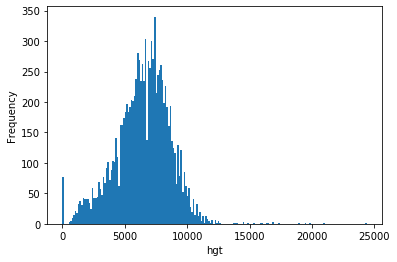

In [28]:
fig, ax = plt.subplots()
ax.hist(hgh, bin_edges, cumulative=False)
ax.set_xlabel('hgt')
ax.set_ylabel('Frequency')
plt.show()

In [31]:
obrub_h = hgh > 3150*4

In [32]:
sum(obrub_h)

27

In [33]:
train_labels[obrub_h]

,image_id,data_provider,isup_grade,gleason_score,PH_size1,PW_size1,PH_size2,PW_size2,PH_mask_size2,PW_mask_size2,PH_mask_size1,PW_mask_size1
261,06f714d78f6f5c545cd149cf71c7c1c1,karolinska,0,0+0,14442.0,8535.0,3610.0,2133.0,3610,2133,14442.0,8535.0
1601,28c34a837397ac08f276bfac99af6daf,karolinska,0,0+0,16384.0,8576.0,4096.0,2144.0,4096,2144,16384.0,8576.0
1721,2b2101125ce01016af9496bed25908e1,karolinska,1,3+3,18924.0,5977.0,4731.0,1494.0,4731,1494,18924.0,5977.0
1750,2be84345474f8546c2607c6be750ab0e,karolinska,1,3+3,13824.0,8320.0,3456.0,2080.0,3456,2080,13824.0,8320.0
2205,372ea2dd928988579a7c716c1c36a9bd,karolinska,1,3+3,16931.0,6199.0,4232.0,1549.0,4232,1549,16931.0,6199.0
2979,4aaa6b030833ec19f2ccea7530fbfeb4,karolinska,3,4+3,14442.0,7327.0,3610.0,1831.0,3610,1831,14442.0,7327.0
3314,52bbaa0fbe4b7a3d193fc41eec5b0f46,karolinska,0,0+0,18432.0,13824.0,4608.0,3456.0,4608,3456,13824.0,18432.0
3354,53d99b6d0957c93029223458e5e9e5bc,karolinska,1,3+3,16434.0,6803.0,4108.0,1700.0,4108,1700,16434.0,6803.0
3615,5a1e02d983668583f95b2220fc7dc71d,karolinska,2,3+4,15872.0,6016.0,3968.0,1504.0,3968,1504,15872.0,6016.0
3765,5ddb273c1966b8e5849a9292ed4c96ae,karolinska,0,0+0,19456.0,8192.0,4864.0,2048.0,4864,2048,19456.0,8192.0


In [165]:
hist, bin_edges = np.histogram(hgw, bins=196)

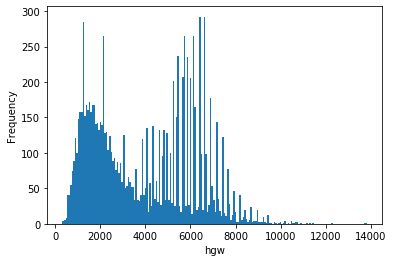

In [166]:
fig, ax = plt.subplots()
ax.hist(hgw, bin_edges, cumulative=False)
ax.set_xlabel('hgw')
ax.set_ylabel('Frequency')
plt.show()

In [136]:
obrub_w = hgw > 3100
sum(obrub_w)

2

In [138]:
#both are excluded by obrub_h criteria
train_labels[obrub_w]

,image_id,data_provider,isup_grade,gleason_score,PH_size1,PW_size1,PH_size2,PW_size2,PH_mask_size2,PW_mask_size2,PH_mask_size1,PW_mask_size1
3314,52bbaa0fbe4b7a3d193fc41eec5b0f46,karolinska,0,0+0,18432.0,13824.0,4608.0,3456.0,4608,3456,13824,18432
10315,f948e5f2b0a49af2c0a7f3f74093262e,karolinska,1,3+3,24576.0,13696.0,6144.0,3424.0,6144,3424,13696,24576


In [190]:
min_w = hgw <150
sum(min_w)

59

In [217]:
min_h = hgt <200
sum(min_h)

12

In [218]:
dd = train_labels[min_h].copy()


In [220]:
dd[:13]

,image_id,data_provider,isup_grade,gleason_score,PH_size1,PW_size1,PH_size2,PW_size2,PH_mask_size2,PW_mask_size2,PH_mask_size1,PW_mask_size1
285,07a14fa5b8f74272e4cc0a439dbc8f7f,radboud,4,4+4,512.0,384.0,128.0,96.0,128,96,512,384
545,0da0915a236f2fc98b299d6fdefe7b8b,radboud,4,4+4,576.0,320.0,144.0,80.0,144,80,576,320
573,0e5806abc1cf909123d584e504dd9bf9,radboud,5,5+5,768.0,704.0,192.0,176.0,192,176,768,704
575,0e62a4cba998a03d20295e07ebc30958,radboud,4,5+3,768.0,768.0,192.0,192.0,192,192,768,768
2688,432ec3aa0403cfd011d4489879fada9c,radboud,3,4+3,640.0,448.0,160.0,112.0,160,112,640,448
4829,77545268b9c0cec2fd73b7cb9e03d66b,radboud,0,0+0,768.0,640.0,192.0,160.0,192,160,768,640
5045,7c90a7a9ea4b644c26fa03ffd564676c,radboud,4,4+4,640.0,576.0,160.0,144.0,160,144,640,576
5758,8d5860e10e09ee25e066ee7fb699453d,radboud,4,4+4,640.0,576.0,160.0,144.0,160,144,640,576
6308,9a4ba048c62623465d6a7a0d8549a657,radboud,4,4+4,576.0,576.0,144.0,144.0,144,144,576,576
6485,9e40b83c6ac2b92e2426b717ed1a200e,radboud,4,4+4,704.0,576.0,176.0,144.0,176,144,704,576


In [234]:
unable_arr_sise1_large = []
with open('faults_size1_large.txt', 'r') as ff:
    for line in ff:
        unable_arr_sise1_large .append(line[:-1])

In [235]:
id_unable_arr_sise1_large  = [g.split('.')[0] for g in unable_arr_sise1_large ]

In [247]:
len(id_unable_arr_sise1_large)

12

In [248]:
num_arr = []
for i, row in enumerate(train_labels.iterrows()):
    if row[1][0] in id_unable_arr_sise1_large:
        num_arr.append(i)
train_labels.iloc[num_arr]

,image_id,data_provider,isup_grade,gleason_score,PH_size1,PW_size1,PH_size2,PW_size2,PH_mask_size2,PW_mask_size2,PH_mask_size1,PW_mask_size1
285,07a14fa5b8f74272e4cc0a439dbc8f7f,radboud,4,4+4,512.0,384.0,128.0,96.0,128,96,512,384
573,0e5806abc1cf909123d584e504dd9bf9,radboud,5,5+5,768.0,704.0,192.0,176.0,192,176,768,704
2227,3790f55cad63053e956fb73027179707,karolinska,0,0+0,7936.0,6400.0,1984.0,1600.0,1984,1600,7936,6400
2311,39b20d5c2588bafb42c5d6915de11b6b,karolinska,2,3+4,20992.0,9792.0,5248.0,2448.0,5248,2448,9792,20992
3245,5123de8a47c1584b66fea313adb4e2d3,karolinska,0,0+0,20480.0,9024.0,5120.0,2256.0,5120,2256,9024,20480
3314,52bbaa0fbe4b7a3d193fc41eec5b0f46,karolinska,0,0+0,18432.0,13824.0,4608.0,3456.0,4608,3456,13824,18432
4185,680984934a44ffcfc33f21b9b62f9436,karolinska,0,0+0,17408.0,10688.0,4352.0,2672.0,4352,2672,10688,17408
5177,7fff6b6143de8f92c066b3fc8296ffbe,karolinska,1,3+3,5353.0,5229.0,1338.0,1307.0,1338,1307,5353,5229
6014,93c360d81e7e85d723da037885008528,karolinska,0,0+0,24576.0,9920.0,6144.0,2480.0,6144,2480,9920,24576
6616,a10eb69fb260132fde150bd76bd7b15c,karolinska,0,0+0,20992.0,11456.0,5248.0,2864.0,5248,2864,11456,20992


In [241]:
unable_arr_size1_small = []
with open('faults_size1_small.txt', 'r') as ff:
    for line in ff:
        unable_arr_size1_small .append(line[:-1])

In [242]:
id_unable_arr_size1_small  = [g.split('.')[0] for g in unable_arr_size1_small]

In [243]:
num_arr = []
for i, row in enumerate(train_labels.iterrows()):
    if row[1][0] in id_unable_arr_size1_small:
        num_arr.append(i)
train_labels.iloc[num_arr]

,image_id,data_provider,isup_grade,gleason_score,PH_size1,PW_size1,PH_size2,PW_size2,PH_mask_size2,PW_mask_size2,PH_mask_size1,PW_mask_size1
2227,3790f55cad63053e956fb73027179707,karolinska,0,0+0,7936.0,6400.0,1984.0,1600.0,1984,1600,7936,6400
2311,39b20d5c2588bafb42c5d6915de11b6b,karolinska,2,3+4,20992.0,9792.0,5248.0,2448.0,5248,2448,9792,20992
3245,5123de8a47c1584b66fea313adb4e2d3,karolinska,0,0+0,20480.0,9024.0,5120.0,2256.0,5120,2256,9024,20480
3314,52bbaa0fbe4b7a3d193fc41eec5b0f46,karolinska,0,0+0,18432.0,13824.0,4608.0,3456.0,4608,3456,13824,18432
4185,680984934a44ffcfc33f21b9b62f9436,karolinska,0,0+0,17408.0,10688.0,4352.0,2672.0,4352,2672,10688,17408
5177,7fff6b6143de8f92c066b3fc8296ffbe,karolinska,1,3+3,5353.0,5229.0,1338.0,1307.0,1338,1307,5353,5229
6014,93c360d81e7e85d723da037885008528,karolinska,0,0+0,24576.0,9920.0,6144.0,2480.0,6144,2480,9920,24576
6616,a10eb69fb260132fde150bd76bd7b15c,karolinska,0,0+0,20992.0,11456.0,5248.0,2864.0,5248,2864,11456,20992
6847,a6a7146bd23b394f54a5950d2dbefa7b,karolinska,0,0+0,20992.0,11328.0,5248.0,2832.0,5248,2832,11328,20992
10315,f948e5f2b0a49af2c0a7f3f74093262e,karolinska,1,3+3,24576.0,13696.0,6144.0,3424.0,6144,3424,13696,24576


In [246]:
set(id_unable_arr_sise1_large) - set(id_unable_arr_size1_small)

{'07a14fa5b8f74272e4cc0a439dbc8f7f', '0e5806abc1cf909123d584e504dd9bf9'}

In [172]:
train_labels[['image_id','isup_grade']].groupby('isup_grade').count()

,image_id
isup_grade,
0,2892
1,2666
2,1343
3,1242
4,1249
5,1224


In [48]:
gl_class_labels[:20]

,image_id,data_provider,isup_grade,gleason_score
0,0005f7aaab2800f6170c399693a96917,karolinska,0,0
1,000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0
2,0018ae58b01bdadc8e347995b69f99aa,radboud,4,4
3,001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4
4,001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0
5,002a4db09dad406c85505a00fb6f6144,karolinska,0,0
6,003046e27c8ead3e3db155780dc5498e,karolinska,1,3
7,0032bfa835ce0f43a92ae0bbab6871cb,karolinska,1,3
8,003a91841da04a5a31f808fb5c21538a,karolinska,1,3
9,003d4dd6bd61221ebc0bfb9350db333f,karolinska,1,3


In [49]:
gl_class_labels.shape

(11951, 4)

In [50]:
gl_score_labels.shape

(10616, 4)

In [ ]:
dd.sort_values('isup_grade', ascending=False, inplace = True)

In [206]:
#ttt = np.argwhere(np.isnan(hgm))#.reshape(-1)
#ttt
#NaN

#### 2.2. Finally: ####

In [140]:
ost_h = hgt < 3150

In [142]:
fin_train_labels = train_labels[ost_h]
fin_train_labels.shape

(10583, 12)

In [262]:
set1 = set(fin_train_labels.index)

In [256]:
set2 = set(num_arr)

In [266]:
fin_exclude = set1 & set2
fin_exclude

{285, 573, 2227, 5177}

In [267]:
fin_train_labels.drop(fin_exclude, axis = 0, inplace = True)

/home/admin/.local/lib/python3.6/site-packages/pandas/core/frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [268]:
fin_train_labels.shape

(10579, 12)

In [269]:
#fin_train_labels.to_csv(os.path.join(base_path, 'train_fin.csv'), index_label=False)

### 3. Resize to 512x512 ###

1. We get the max dimensions

In [51]:
%%time
kk = []
for img_id in tqdm(train_labels.image_id):
    load_path = os.path.join(train_path, img_id + '.tiff')    
    save_path = os.path.join(train_size2, img_id + '.jpg')
    try:
        biopsy = skimage.io.MultiImage(load_path)[2]
        img = cv2.resize(biopsy[-1], (512, 512))
        cv2.imwrite(save_path, img, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
    except Exception as e:
        print(str(e))
        print(img_id)

There are only 0 images in the collection
fdd274c74c4e52e77e9b0b19e071d1a3

CPU times: user 3min 41s, sys: 7.08 s, total: 3min 48s
Wall time: 3min 47s


### 3.Corrupted images ###

#### 3.1. Image 'fdd274c74c4e52e77e9b0b19e071d1a3.tiff' IS CORRUPTED ####

In [ ]:
# as on 09/06/2010: 507bb5873324858d94e7ea6bd043fa66_mask.tiff

In [71]:

jj = skimage.io.MultiImage(os.path.join(data_dir, 'fdd274c74c4e52e77e9b0b19e071d1a3.tiff'))
vars(jj)['data']

array([None], dtype=object)

In [74]:
train_labels.loc[train_labels.image_id == 'fdd274c74c4e52e77e9b0b19e071d1a3']

,image_id,data_provider,isup_grade,gleason_score
10521,fdd274c74c4e52e77e9b0b19e071d1a3,karolinska,1,3+3


In [80]:
#there are a lot of such images with isup_grade 1 (3+3), so we can exclude this image and its mask
#tt = os.path.join(mask_size2_dir, 'fdd274c74c4e52e77e9b0b19e071d1a3'+'_mask.png')
#os.remove(tt)

In [82]:
train_corr = train_labels.copy()

In [92]:
train_corr.drop(axis=0, index=10521, inplace=True)
train_corr.shape

(10615, 4)

### 4. Replace "negative" for "0+0" ###

In [12]:
#replace(self, to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')[source]

train_labels.replace(to_replace = 'negative', value= '0+0', inplace=True)
train_labels.to_csv(os.path.join(base_path, 'train_corr.csv'),  index_label=False)

In [ ]:
#!tar -czf train_images.tar.gz ../train_images/*.png
#!tar -czf train_label_masks.tar.gz ../train_label_masks/*.png

In [40]:
gl_class_labels.shape

(11951, 4)

In [44]:
os.listdir(gleason_path)

['gs0', 'gs3', 'gs4', 'gs5']

### 5. Eliminate white areas on samples and tile them ###

In [432]:
def eliminate_white_area(zoom,                          
                          fault_name = 'faults_size2_large.txt',                          
                          from_path = train_size2,
                          save_fold_name = os.path.join(base_path, 'train_nwh_small_size'),
                          df_name = 'no_white_data_size0.csv',
                          tile_square_yside = 400, tile_square_xside = 250, 
                          tile_fill = 0.3,
                          threshold = 241,
                         file_list = None,
                          transform_ratios = [2.0, 3.0, 5.0, 6.0, 7.0],
                          final_resize = False, final_size = (512, 512),                          
                          compression = 9,\
                          write_metadata_to_df = True):
    """
    This is a modern version. All improvements apply here.
    
    """
    #constants: 
    etalon_field_value = tile_square_yside*tile_square_xside*255
    if file_list == None: file_list = os.listdir(from_path),
        
    #metadata arrays:
    rs_metadata_arr = []
    size_metadata_arr = []
    tiles_metadata_arr = []   
    
    fault_files = []
    
    #iterate on all files in a fold:
    for file_name in tqdm(file_list):
        try:
            #file to write to:
            #no_white_temp_file = file_name.replace('.tiff', '.jpg')
            save_path = os.path.join(save_fold_name, file_name)
            #neccesary adds-on:
            nonwhite_image_tiles = [] #add tiles to the array
            nonwhite_image_tiles1 = []
            temp_precip = [] #tiles number to abandon 
            #first,load file with selected zoom:
            biopsy = skimage.io.imread(os.path.join(from_path, file_name))        
            #make mask:
            grey_biopsy = cv2.cvtColor(biopsy, cv2.COLOR_BGR2GRAY)
            #we work with black masks on the white area:
            ret, white_mask = cv2.threshold(grey_biopsy, threshold, 255, 0)
            #calculate adds-on:
            ytiles = grey_biopsy.shape[0]//tile_square_yside
            xtiles = grey_biopsy.shape[1]//tile_square_xside
            tiles_number = xtiles*ytiles

            #collect all tiles with non-white area:
            for i in range(ytiles):
                for j in range(xtiles):
                    coordinates = [i*tile_square_yside, (i+1)*tile_square_yside,\
                                   j*tile_square_xside, (j+1)*tile_square_xside]
                    mask_area = white_mask[coordinates[0]:coordinates[1], coordinates[2]:coordinates[3]]
                    if (etalon_field_value - np.sum(mask_area))/etalon_field_value > tile_fill:
                        nonwhite_image_tiles.append(biopsy[coordinates[0]:coordinates[1],\
                                                              coordinates[2]:coordinates[3]])
                    del coordinates, mask_area
            all_tiles = len(nonwhite_image_tiles) #tiles number
            nonwhite_image_tiles = np.array(nonwhite_image_tiles)
            

            #tiles configuration:
            for temp_ratio in transform_ratios:
                temp_dim = int(sqrt(all_tiles/temp_ratio))
                temp_precip.append(int(all_tiles - (temp_dim**2*temp_ratio)))
                final_ratio = transform_ratios[np.argmin(temp_precip, axis=0)]
                final_dim = int(sqrt(all_tiles/final_ratio))


            #reshape tiles array and abandon several tiles:
            nonwhite_image_tiles1 = nonwhite_image_tiles[:int(final_dim**2*final_ratio),:,:,:]
            a, b, c, d = nonwhite_image_tiles1.shape
            data_new = (nonwhite_image_tiles1.reshape(int(final_dim), int(final_dim*final_ratio),\
                                                    b, c, d).swapaxes(1,2).reshape(b*int(final_dim),\
                                                    c*int(final_dim*final_ratio), d))
            #final resize, if demanded:
            if final_resize: data_new = cv2.resize(data_new, final_size)

            #write on the disk:
            cv2.imwrite(save_path, data_new, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
            #cv2.imwrite(save_path, data_new, [int(cv2.IMWRITE_PNG_COMPRESSION), compression])
            #skimage.io.imshow(data_new[1000:1600, 1200:1400])
            # collect garbage:
            del biopsy, nonwhite_image_tiles, nonwhite_image_tiles1, temp_precip
            gc.collect()

            # write relative square metadata:        
            if write_metadata_to_df: 
                rs_metadata_arr.append((1 -(np.sum(np.array(white_mask)))/(white_mask.shape[0]*\
                                                                    white_mask.shape[1]*255))*10000//100/100)
                size_metadata_arr.append((grey_biopsy.shape, data_new.shape))
                tiles_metadata_arr.append((ytiles, xtiles, int(final_dim)*int(final_ratio*final_dim),\
                                           all_tiles/tiles_number*10000//100/100,\
                                            final_ratio ))

            # collect garbage:
            del grey_biopsy, ret, white_mask, data_new
            gc.collect()
        except Exception as ee:
            print(ee)
            fault_files.append(file_name)
            with open(fault_name,'a') as ff:
                ff.write(file_name)
                ff.write('\n')
            

    # loop end
    print(fault_files)
    # save dataframe:
    # minlen = min(len(rs_metadata_arr), len(size_metadata_arr), len(tiles_metadata_arr))
    if write_metadata_to_df:
        temp_dict = {'filename': file_list,
                    'non-white_area': rs_metadata_arr,
                    'biopsy_shape': [ii[0] for ii in size_metadata_arr],
                    'final_shape': [ii[1] for ii in size_metadata_arr],
                    #'y_tiles': [ii[0] for ii in tiles_metadata_arr],
                    #'x_tiles': [ii[1] for ii in tiles_metadata_arr],
                    'all_tiles': [ii[2] for ii in tiles_metadata_arr],
                    #'area_under_tiles': [ii[3] for ii in tiles_metadata_arr],
                    #'final_ratio': [ii[4] for ii in tiles_metadata_arr],
                    #'final_tile_size': ([ii[5] for ii in tiles_metadata_arr]),\
                     #'final_tile_size_x': [ii[6] for ii in tiles_metadata_arr],\
                    }
        temp_df = pd.DataFrame(data=temp_dict)
        temp_df.set_index('filename',inplace = True)
        temp_df.to_csv(os.path.join(base_path, df_name), index_label=False)
        del rs_metadata_arr, size_metadata_arr, tiles_metadata_arr, temp_df, temp_dict
        gc.collect()

In [ ]:
# size 1: 
#small: tile_fill = 0.8, tile_square_yside = 100, tile_square_xside = 80,
#       fault_name = 'faults_small_size1.txt'
#
#large: tile_fill = 0.3, tile_square_yside = 400, tile_square_xside = 250
#       fault_name = 'faults_large_size1.txt'
#

#size 2: 
#small: tile_fill = 0.5, 50 x 50  ,
#large: tile_fill = 0.25, tile_square_yside = 120, tile_square_xside = 90  (and 50 files - 100 x 80)
# fault_name = 'faults_large_size2.txt'

#### 5.1. Test area ####

In [25]:
%%time
eliminate_white_area(zoom = 1,                     
                     fault_name = 'faults_size1_large.txt',
                     from_path = train_size1,
                     file_list = os.listdir(train_size1)[:10],
                     save_fold_name = os.path.join(base_path, 'temp'),
                     df_name = 'nowh_large_size1.csv',
                     tile_fill = 0.3,                     
                     tile_square_yside = 400, tile_square_xside = 300, 
                     write_metadata_to_df = True)



[]
CPU times: user 8.23 s, sys: 2.67 s, total: 10.9 s
Wall time: 11.5 s


In [24]:
ddd = pd.read_csv(os.path.join(base_path, 'nowh_large_size1.csv'))
ddd.head(15)

,non-white_area,biopsy_shape,final_shape,all_tiles
0005f7aaab2800f6170c399693a96917.jpg,0.03,"(7360, 6912)","(1000, 1800, 3)",12
000920ad0b612851f8e01bcc880d9b3d.jpg,0.05,"(3328, 3840)","(500, 1800, 3)",6
0018ae58b01bdadc8e347995b69f99aa.jpg,0.19,"(6336, 1472)","(1000, 1800, 3)",12
001c62abd11fa4b57bf7a6c603a11bb9.jpg,0.04,"(7166, 5976)","(1000, 1800, 3)",12
001d865e65ef5d2579c190a0e0350d8f.jpg,0.05,"(8640, 7168)","(2000, 2400, 3)",32
002a4db09dad406c85505a00fb6f6144.jpg,0.03,"(8193, 5976)","(1000, 1800, 3)",12
003046e27c8ead3e3db155780dc5498e.jpg,0.04,"(8256, 5888)","(1500, 1800, 3)",18
0032bfa835ce0f43a92ae0bbab6871cb.jpg,0.02,"(7025, 5976)","(1000, 1800, 3)",12
003a91841da04a5a31f808fb5c21538a.jpg,0.04,"(2513, 3984)","(500, 2100, 3)",7
003d4dd6bd61221ebc0bfb9350db333f.jpg,0.03,"(5632, 7936)","(1000, 1800, 3)",12


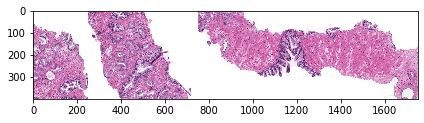

In [26]:
filename = os.path.join(base_path, 'temp', '003a91841da04a5a31f808fb5c21538a.jpg')
biopsy = skimage.io.imread(filename)     
skimage.io.imshow(biopsy) #[600:900, 1600:2500])

#### 5.2. Claculate area ####

In [4]:
original_train_files = os.listdir(train_size1)

In [55]:
#unable_arr = []
#with open('faults_size2_large.txt', 'r') as ff:
#    for line in ff:
#        unable_arr.append(line[:-1])

In [35]:
unable_arr = ['3790f55cad63053e956fb73027179707.jpg', '39b20d5c2588bafb42c5d6915de11b6b.jpg', '5123de8a47c1584b66fea313adb4e2d3.jpg', '5204134e82ce75b1109cc1913d81abc6.jpg', '52bbaa0fbe4b7a3d193fc41eec5b0f46.jpg', '680984934a44ffcfc33f21b9b62f9436.jpg', '7fff6b6143de8f92c066b3fc8296ffbe.jpg', '93c360d81e7e85d723da037885008528.jpg', 'a10eb69fb260132fde150bd76bd7b15c.jpg', 'a6a7146bd23b394f54a5950d2dbefa7b.jpg', 'f948e5f2b0a49af2c0a7f3f74093262e.jpg']

In [36]:
%%time
eliminate_white_area(zoom = 1,                     
                     fault_name = 'faults_size1_small.txt',
                     from_path = train_size1,
                     file_list = unable_arr, #os.listdir(train_size1),
                     save_fold_name = os.path.join(base_path, 'train_nwh_small_size1'),
                     df_name = 'nowh_small_size1.csv',
                     tile_fill = 0.8,                     
                     tile_square_yside = 50, tile_square_xside = 50, 
                     write_metadata_to_df = False)

too many indices for array
Image size (205553664 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.
Image size (184811520 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.
Image size (254803968 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.
Image size (186056704 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.
Could not load "" 
Reason: "image file is truncated (121 bytes not processed)"
Please see documentation at: http://pillow.readthedocs.io/en/latest/installation.html#external-libraries
Image size (243793920 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.
Image size (240484352 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.
Image size (237797376 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.
Image size (336592896 pixels) exceeds limit of 1789569

In [29]:
%%time
eliminate_white_area(zoom = 1,                     
                     fault_name = 'faults_size1_large.txt',
                     from_path = train_size1,
                     file_list = os.listdir(train_size1),
                     save_fold_name = os.path.join(base_path, 'train_nwh_large_size1'),
                     df_name = 'nowh_small_size1.csv',
                     tile_fill = 0.3,                     
                     tile_square_yside = 400, tile_square_xside = 250, 
                     write_metadata_to_df = False)

OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (90243072 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (100270080 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (130908160 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (131891200 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (126844928 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (

OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (90898432 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (110837760 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (92602368 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (104955269 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


too many indices for array
Image size (205553664 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.


/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (112017408 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (125042688 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (105250816 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (105816534 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


Image size (184811520 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.
Image size (254803968 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.


/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (103661568 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (111800502 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (123125760 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (107085824 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (

too many indices for array


/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (93055745 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


Image size (186056704 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.


/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (161251328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (169211905 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (100024320 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (90882048 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (1

OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

Could not load "" 
Reason: "image file is truncated (121 bytes not processed)"
Please see documentation at: http://pillow.readthedocs.io/en/latest/installation.html#external-libraries


/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (120294755 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (109314048 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (169080960 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (105676800 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (90649944 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (95174656 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


Image size (243793920 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.


/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (122787305 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (90095616 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (89621041 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (114130944 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (104792064 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (112459776 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


Image size (240484352 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.


/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (90275840 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (151423872 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (90685440 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


Image size (237797376 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.


/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (89653248 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (127057920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (115539968 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (127598592 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (9

OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (91750400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (110886912 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


too many indices for array
OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (92323840 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (90524448 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (100827136 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (106539132 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (10

OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (163196367 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (95586120 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (141508692 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (91930624 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (12

Image size (336592896 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.


/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (141066240 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/admin/.local/lib/python3.6/site-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (107479040 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,



['07a14fa5b8f74272e4cc0a439dbc8f7f.jpg', '0da0915a236f2fc98b299d6fdefe7b8b.jpg', '0e5806abc1cf909123d584e504dd9bf9.jpg', '0e62a4cba998a03d20295e07ebc30958.jpg', '0f1ea91c9f917bb3d198f02fd432e4ce.jpg', '3385a0f7f4f3e7e7b380325582b115c9.jpg', '3790f55cad63053e956fb73027179707.jpg', '39b20d5c2588bafb42c5d6915de11b6b.jpg', '432ec3aa0403cfd011d4489879fada9c.jpg', '5123de8a47c1584b66fea313adb4e2d3.jpg', '52bbaa0fbe4b7a3d193fc41eec5b0f46.jpg', '60502735df319ec33f862579fb6563d5.jpg', '680984934a44ffcfc33f21b9b62f9436.jpg', '7c90a7a9ea4b644c26fa03ffd564676c.jpg', '7fff6b6143de8f92c066b3fc8296ffbe.jpg', '88e65e1d716893e6efdbd2464b3686fa.jpg', '8d5860e10e09ee25e066ee7fb699453d.jpg', '93c360d81e7e85d723da037885008528.jpg', '963cdce0573b4883f8c416d9808d6e84.jpg', '9761fb9e15e37b85ea603dbedd0db804.jpg', '9c24ae764d87098d03faccc2e2a579d0.jpg', 'a10eb69fb260132fde150bd76bd7b15c.jpg', 'a6a7146bd23b394f54a5950d2dbefa7b.jpg', 'b5d27a874ddb2c49f7a77e70b97e0021.jpg', 'b99ca5db00eca6566d106abce9cba70c.jpg'

In [30]:
unable_arr = ['07a14fa5b8f74272e4cc0a439dbc8f7f.jpg', '0da0915a236f2fc98b299d6fdefe7b8b.jpg', '0e5806abc1cf909123d584e504dd9bf9.jpg', '0e62a4cba998a03d20295e07ebc30958.jpg', '0f1ea91c9f917bb3d198f02fd432e4ce.jpg', '3385a0f7f4f3e7e7b380325582b115c9.jpg', '3790f55cad63053e956fb73027179707.jpg', '39b20d5c2588bafb42c5d6915de11b6b.jpg', '432ec3aa0403cfd011d4489879fada9c.jpg', '5123de8a47c1584b66fea313adb4e2d3.jpg', '52bbaa0fbe4b7a3d193fc41eec5b0f46.jpg', '60502735df319ec33f862579fb6563d5.jpg', '680984934a44ffcfc33f21b9b62f9436.jpg', '7c90a7a9ea4b644c26fa03ffd564676c.jpg', '7fff6b6143de8f92c066b3fc8296ffbe.jpg', '88e65e1d716893e6efdbd2464b3686fa.jpg', '8d5860e10e09ee25e066ee7fb699453d.jpg', '93c360d81e7e85d723da037885008528.jpg', '963cdce0573b4883f8c416d9808d6e84.jpg', '9761fb9e15e37b85ea603dbedd0db804.jpg', '9c24ae764d87098d03faccc2e2a579d0.jpg', 'a10eb69fb260132fde150bd76bd7b15c.jpg', 'a6a7146bd23b394f54a5950d2dbefa7b.jpg', 'b5d27a874ddb2c49f7a77e70b97e0021.jpg', 'b99ca5db00eca6566d106abce9cba70c.jpg', 'b9e30b8ac80e5d51b4ff18de8eb08fcf.jpg', 'd14168b713f3ba30243a69837a001115.jpg', 'f948e5f2b0a49af2c0a7f3f74093262e.jpg']

In [33]:
%%time
eliminate_white_area(zoom = 1,                     
                     fault_name = 'faults_size1_large.txt',
                     from_path = train_size1,
                     file_list = unable_arr,
                     save_fold_name = os.path.join(base_path, 'train_nwh_large_size1'),
                     df_name = 'nowh_small_size1.csv',
                     tile_fill = 0.3,                     
                     tile_square_yside = 250, tile_square_xside = 200, 
                     write_metadata_to_df = False)

too many indices for array
OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

too many indices for array
Image size (205553664 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.
Image size (184811520 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.
Image size (254803968 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.
Image size (186056704 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.
Could not load "" 
Reason: "image file is truncated (121 bytes not processed)"
Please see documentation at: http://pillow.readthedocs.io/en/latest/installation.html#external-libraries
Image size (243793920 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.
Image size (240484352 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.

### 5. get the area of an image with cancer, based on the mask ###

#### 5.1. Prepare cancer areas for CNN learning based on ISUP grade ####

Karolinska an Randbound masks are diffrent.
To obtain ISUP masks for Karolinska, just copy masks to the fold.


In [202]:
#images = [tt.split('_')[0] for tt in os.listdir(original_mask_path)]
data_sample = train_labels.loc[train_labels.data_provider == 'karolinska']
#ddd = data_sample.loc[data_sample.isup_grade == 5]
#ddd = ddd.head(5)

In [205]:
#%%time
#copy_df_files(dff = data_sample, input_folder = mask_size2, 
#              output_folder = os.path.join(base_path, 'mask_isup_size2_bl')) #
#os.path.join(base_path, 'temp'))

CPU times: user 14.7 s, sys: 1min 11s, total: 1min 25s
Wall time: 12min 27s


To obtain 'correct" masks for Radboud, we first substitute:
[1, 2] -> 1
[3, 4, 5] -> 2

In [36]:
def change_radboud_mask_for_isup_grade(df_radb_cancer,
                                      input_folder = mask_size2,
                                      output_folder = temp_path,
                                      gauss_bl = 25):
    """
    This function processes radbound masks and writes processed masks to folder
    """
    for i,data_row in enumerate(df_radb_cancer.iterrows()):
        try:
            mask_image = str(data_row[1][0])+'_mask.png'
            mask_path = os.path.join(input_folder, mask_image)
            save_path = os.path.join(output_folder, str(data_row[1][0])+'_mask.png')
            mask_data = skimage.io.imread(mask_path)
            new_mask = np.zeros(mask_data.shape).astype(int)

            for area_value in range(6):
                try:                
                    mask_area = np.where(mask_data[:,:,2] == area_value)
                    if area_value == 0:
                        new_mask[mask_area[0], mask_area[1], 2] = 0               
                    if (area_value == 1 or area_value == 2):
                        new_mask[mask_area[0], mask_area[1], 2] = 1
                    elif area_value in [3, 4, 5]:
                        new_mask[mask_area[0], mask_area[1], 2] = 2
                except Exception as ee:
                    print(str(ee))
                    continue
                finally:
                    del mask_area
                
        except Exception as ee:
            print(str(ee))
        del mask_data
        #new_mask[:,:,2] = cv2.blur(new_mask[:,:, 2],(gauss_bl,gauss_bl))
        new_mask[:,:,2] = cv2.bilateralFilter(np.float32(new_mask[:,:, 2]),gauss_bl,25,25)
        #new_mask[:,:,2] = cv2.GaussianBlur(new_mask[:,:, 2],(gauss_bl,gauss_bl), 0)
        
        #new_mask[:,:,2] =  np.rint(new_mask[:,:,2] #.astype(int)
        new_mask[:,:,2] =  np.ceil(new_mask[:,:,2])
        print(np.unique(new_mask[:,:,2]))       
        cv2.imwrite(save_path, new_mask) #, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])            
                      
    
    return new_mask


#### Test area ####

In [28]:

def display_masks(input_fold = temp_path):
    f, ax = plt.subplots(1, 3, figsize=(8,10))
    for i, file_name in enumerate(os.listdir(input_fold)):
        image_path = os.path.join(input_fold, file_name)
        mask_data = skimage.io.imread(image_path)        
        cmap = matplotlib.colors.ListedColormap(['black', 'lightgray', 'darkgreen', 'yellow', 'orange', 'red'])
        ax[i%3].imshow(np.asarray(mask_data)[:,:,0], cmap=cmap, interpolation='nearest', vmin=0, vmax=5)      
        ax[i%3].axis('off')
        ax[i%3].axis('off')
            
    plt.show()

[0. 1. 2.]


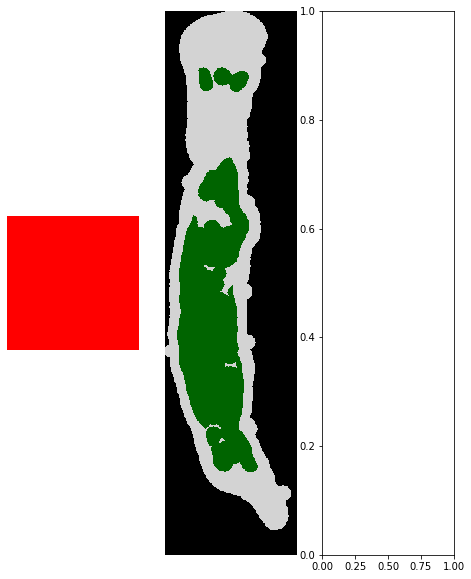

In [29]:
#prime
change_radboud_mask_for_isup_grade(df_radb_cancer = kkk,
                                      output_folder = temp_path)
display_masks()

In [21]:
data_sample = train_labels.loc[train_labels.data_provider == 'radboud']

In [22]:
ddd = data_sample.loc[1000:1006]
ddd

,image_id,data_provider,isup_grade,gleason_score,PH_size1,PW_size1,PH_size2,PW_size2,PH_mask_size2,PW_mask_size2,PH_mask_size1,PW_mask_size1
1000,19963a5a3c42675307056e0be36851cf,radboud,3,4+3,3712.0,896.0,928.0,224.0,928,224,3712.0,896.0
1004,19cd8d1657528f7d4895398a6fd093ec,radboud,4,4+4,6464.0,2944.0,1616.0,736.0,1616,736,6464.0,2944.0


In [76]:
#ddd = data_sample.loc[data_sample.isup_grade == 5]
#ddd = ddd.iloc[20:23]
#ddd

[0.         0.00213472 0.00213472 ... 1.92312813 1.92744029 1.93188822]


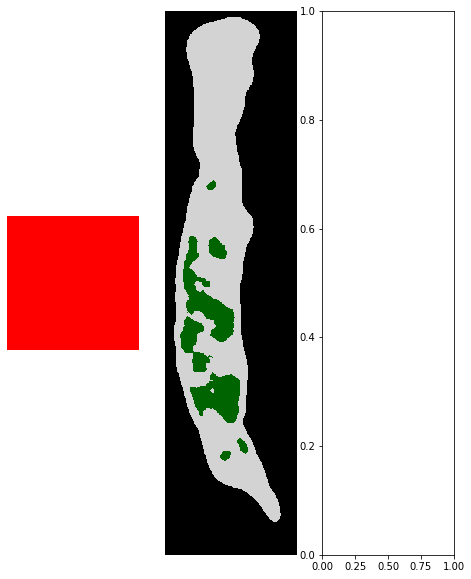

In [31]:
change_radboud_mask_for_isup_grade(df_radb_cancer = kkk,
                                      output_folder = temp_path)
display_masks()

[0. 1. 2.]


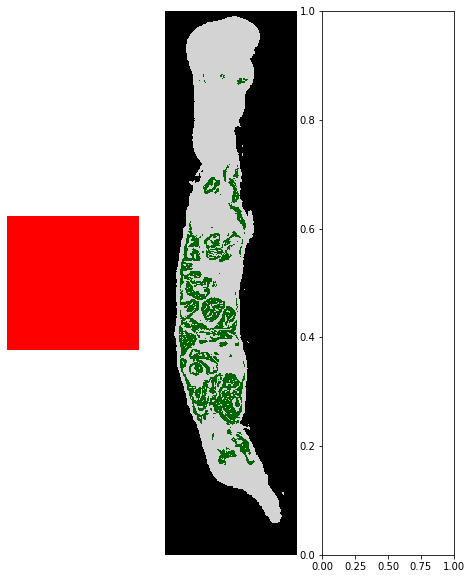

In [33]:
change_radboud_mask_for_isup_grade(df_radb_cancer = kkk,
                                      output_folder = temp_path)
display_masks()

[0. 1. 2.]


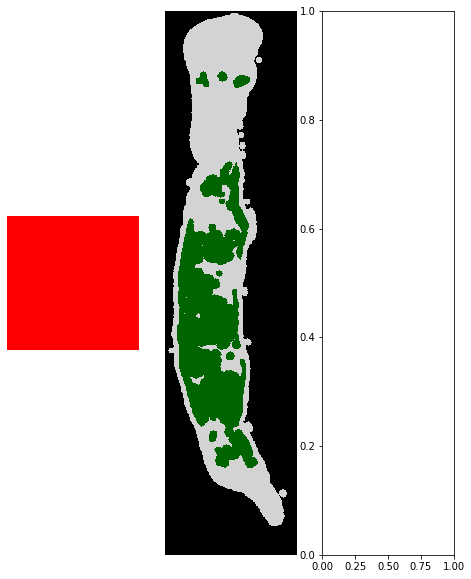

In [38]:
change_radboud_mask_for_isup_grade(df_radb_cancer = kkk,
                                      output_folder = temp_path, 
                                   gauss_bl = 10)
display_masks()

006f6aa35a78965c92fffd1fbd53a058.jpg
007433133235efc27a39f11df6940829.jpg
0076bcb66e46fb485f5ba432b9a1fe8a.jpg
008069b542b0439ed69b194674051964.jpg
044b0937a90ecc3347acac21e9cd39f6_mask.png
046b35ae95374bfb48cdca8d7c83233f_mask.png
04875b8121c928cc022dd6f26a307d06_mask.png


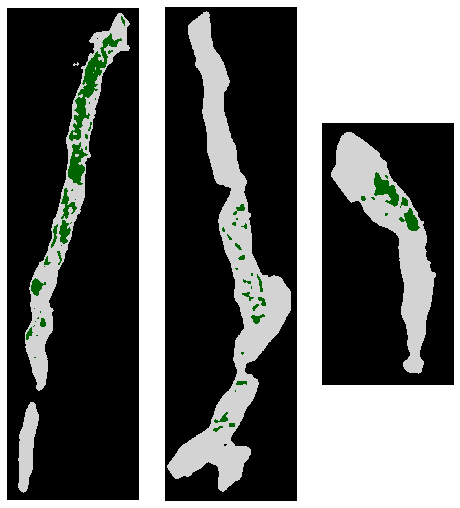

In [509]:
#gaussian blur
change_radboud_mask_for_isup_grade(df_radb_cancer = ddd,
                                      output_folder = temp_path,
                                  gauss_bl =25)
display_masks()

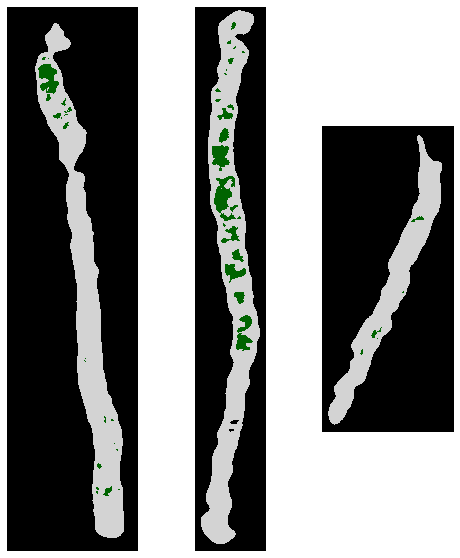

In [37]:
#bilateral filter
change_radboud_mask_for_isup_grade(df_radb_cancer = ddd,
                                   gauss_bl =25,
                                      output_folder = temp_path+'4')
display_masks(input_fold = temp_path+'4')

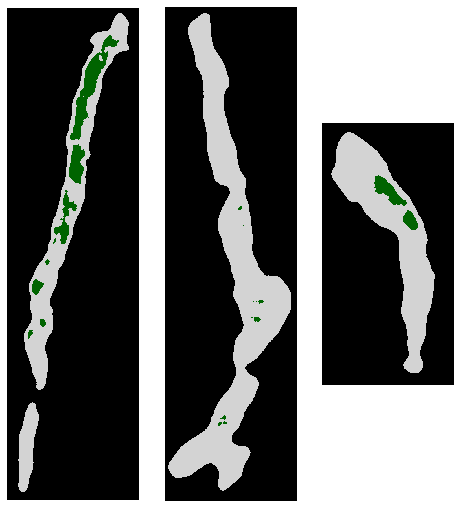

In [526]:
#blur
change_radboud_mask_for_isup_grade(df_radb_cancer = ddd,
                                      output_folder = temp_path, gauss_bl = 25)
display_masks()

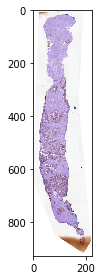

In [6]:
test_mask = os.path.join(train_size2, '19963a5a3c42675307056e0be36851cf.jpg')
biopsy =  skimage.io.imread(test_mask) #MultiImage(test_mask)[1]
skimage.io.imshow(biopsy[:,:,:])   

In [7]:
biopsy.shape

(928, 224, 3)

In [8]:
test_mask = os.path.join(mask_size2, '19963a5a3c42675307056e0be36851cf_mask.png')
mask = skimage.io.imread(test_mask)
mask.shape

(928, 224, 3)

In [9]:
np.unique(mask[:,:,2])

array([0, 1, 2, 3, 4], dtype=uint8)

In [10]:
kkk = train_labels.loc[1000:1000]
kkk

,image_id,data_provider,isup_grade,gleason_score,PH_size1,PW_size1,PH_size2,PW_size2,PH_mask_size2,PW_mask_size2,PH_mask_size1,PW_mask_size1
1000,19963a5a3c42675307056e0be36851cf,radboud,3,4+3,3712.0,896.0,928.0,224.0,928,224,3712.0,896.0


In [14]:
cc, new_mask = change_radboud_mask_for_isup_grade_direct(mask,
                                      gauss_bl = 20)

In [15]:
cc

True

In [235]:
#mask = change_radboud_mask_for_isup_grade(df_radb_cancer = kkk,
#                                      input_folder = mask_size2,
#                                      output_folder = temp_path,
#                                      gauss_bl = 25)

In [16]:
np.unique(new_mask[:,:,0])

array([0., 1.])

In [17]:
np.unique(biopsy[:,:,1])

array([  1,   6,  13,  17,  27,  28,  30,  32,  33,  34,  35,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 20

In [18]:
type(biopsy)

numpy.ndarray

/home/admin/.local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


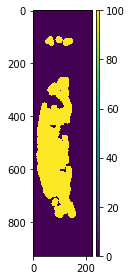

In [19]:
skimage.io.imshow(new_mask[:,:,2]*100) 

In [240]:
ttt = np.multiply(biopsy,new_mask).astype(int)
ttt[500, 90, 0]

162

In [241]:
ttt[500, 90, 2]

166

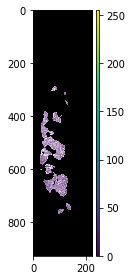

In [242]:
#tt = cv2.bitwise_not(ttt)
skimage.io.imshow(ttt)

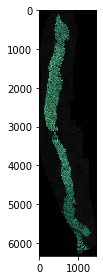

In [678]:
temp_im = biopsy.astype('uint8') * 255
skimage.io.imshow(temp_im) 

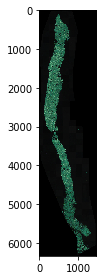

In [679]:
temp_im = biopsy.astype('uint8') #* 255
temp_im = cv2.bitwise_not(temp_im)
skimage.io.imshow(temp_im) 

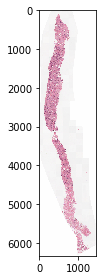

In [677]:
temp_im = biopsy.astype('uint8') * 255
temp_im = cv2.bitwise_not(temp_im)
skimage.io.imshow(temp_im) 

In [22]:
biopsy.shape

(1584, 368, 3)

In [78]:
print(np.unique(biopsy[:,:,2]))

[0 1 2]


In [95]:
#biopsy = skimage.io.imread(os.path.join(mask_size1, '507bb5873324858d94e7ea6bd043fa66_mask.jpg'))
#skimage.io.imshow(biopsy)                         

#### Production area ####

In [81]:
def eliminate_white_direct(biopsy,
                           save_file_name,
                           zoom =2,                          
                          fault_name = 'faults_size2_large_mask.txt', 
                          tile_square_yside = 400, tile_square_xside = 250, 
                          tile_fill = 0.3,
                          threshold = 241,
                         file_list = None,
                          transform_ratios = [2.0, 3.0, 5.0, 6.0, 7.0],                         
                          compression = 9):
    """
    This is a modern version. All improvements apply here.
    
    """
    #constants: 
    etalon_field_value = tile_square_yside*tile_square_xside*255
        
    #metadata arrays:
    
    fault_files = []
    
    try:

        #file to write to:
        #no_white_temp_file = file_name.replace('.tiff', '.jpg')
        #neccesary adds-on:
        nonwhite_image_tiles = [] #add tiles to the array
        nonwhite_image_tiles1 = []
        temp_precip = [] #tiles number to abandon       
        #make mask:
        grey_biopsy = cv2.cvtColor(biopsy, cv2.COLOR_BGR2GRAY)
        #we work with black masks on the white area:
        ret, white_mask = cv2.threshold(grey_biopsy, threshold, 255, 0)
        #calculate adds-on:
        ytiles = grey_biopsy.shape[0]//tile_square_yside
        xtiles = grey_biopsy.shape[1]//tile_square_xside
        tiles_number = xtiles*ytiles

        #collect all tiles with non-white area:
        for i in range(ytiles):
            for j in range(xtiles):
                coordinates = [i*tile_square_yside, (i+1)*tile_square_yside,\
                                   j*tile_square_xside, (j+1)*tile_square_xside]
                mask_area = white_mask[coordinates[0]:coordinates[1], coordinates[2]:coordinates[3]]
                if (etalon_field_value - np.sum(mask_area))/etalon_field_value > tile_fill:
                        nonwhite_image_tiles.append(biopsy[coordinates[0]:coordinates[1],\
                                                              coordinates[2]:coordinates[3]])
                del coordinates, mask_area
        all_tiles = len(nonwhite_image_tiles) #tiles number
        nonwhite_image_tiles = np.array(nonwhite_image_tiles)
            #tiles configuration:
        for temp_ratio in transform_ratios:
            temp_dim = int(sqrt(all_tiles/temp_ratio))
            temp_precip.append(int(all_tiles - (temp_dim**2*temp_ratio)))
            final_ratio = transform_ratios[np.argmin(temp_precip, axis=0)]
            final_dim = int(sqrt(all_tiles/final_ratio))


            #reshape tiles array and abandon several tiles:
        nonwhite_image_tiles1 = nonwhite_image_tiles[:int(final_dim**2*final_ratio),:,:,:]
        a, b, c, d = nonwhite_image_tiles1.shape
        data_new = (nonwhite_image_tiles1.reshape(int(final_dim), int(final_dim*final_ratio),\
                                                    b, c, d).swapaxes(1,2).reshape(b*int(final_dim),\
                                                    c*int(final_dim*final_ratio), d))

            #write on the disk:
        cv2.imwrite(save_file_name, data_new, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
        #cv2.imwrite(save_file_name, data_new, [int(cv2.IMWRITE_PNG_COMPRESSION), compression])
        #print(save_file_name)
            #skimage.io.imshow(data_new[1000:1600, 1200:1400])
            # collect garbage:
        del biopsy, nonwhite_image_tiles, nonwhite_image_tiles1, temp_precip,\
             grey_biopsy, ret, white_mask, data_new
    except Exception as ee:
        print(ee)
        #fault_files.append(file_name)
        #with open(fault_name,'a') as ff:
            #ff.write(file_name)
            #ff.write('\n')

    

In [83]:
def get_masked_image_isup(df_cancer = train_labels, #
                          mask_input_fold = mask_size2, 
                          images_input_fold = train_size2,
                          output_path = temp_path,
                             gauss_bl = 20,
                          compression = 9,
                          transform_ratios = [2.0, 3.0, 5.0, 6.0, 7.0],
                         tile_square_yside = 30, tile_square_xside = 20, 
                          tile_fill = 0.5,
                          threshold = 241):
    """
    Prepares masked images for CNN training, based on ISUP grade
    """
    for i,data_row in enumerate(tqdm(df_cancer.iterrows())):             
        save_path = os.path.join(output_path, str(data_row[1][0])+'.jpg')
        mask_file_path = os.path.join(mask_input_fold, str(data_row[1][0])+'_mask.png')
        biopsy_file_path = os.path.join(images_input_fold, str(data_row[1][0])+'.jpg')
        try:
            biopsy = skimage.io.imread(biopsy_file_path)
            mask = skimage.io.imread(mask_file_path)
            if len(np.unique(mask[:,:,0])) >1:
                channel = 0
            else: 
                channel = 2
        except Exception as ee:
            print(ee)
            continue        
        if str(data_row[1][1]) == 'karolinska':
            cancerous, new_mask  = change_karolinska_mask_for_isup_grade_direct(mask, chan = channel)
        elif str(data_row[1][1]) == 'radboud':
            cancerous, new_mask  = change_radboud_mask_for_isup_grade_direct(mask, chan = channel,
                                      gauss_bl = gauss_bl)
        if cancerous:
            temp_im = get_cancer_area_from_mask(new_mask, biopsy, save_path)
            temp_im = temp_im.astype('uint8') * 255
            inv = cv2.bitwise_not(temp_im )
            #inv = biopsy
        else:
            inv = biopsy
        eliminate_white_direct(biopsy = inv,
                           save_file_name = save_path,
                           zoom =2,                          
                         fault_name = 'faults_size2_large_mask.txt', 
                          tile_square_yside = tile_square_yside,
                            tile_square_xside = tile_square_xside, 
                          tile_fill = tile_fill,
                          threshold = threshold,
                               transform_ratios = transform_ratios,
                         file_list = None,                         
                          compression = compression)
        #cv2.imwrite(save_path, inv, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
        #else:
            #execute_cp_command(biopsy_file_path, save_path)
        del biopsy, mask, inv
        if i%500 == 0: 
            print(i,'\n',str(data_row[1][0])+'.jpg')
            gc.collect()                  
    
    return   

In [34]:
temp_labels = train_labels.copy()
temp_labels.drop([10315], axis = 0, inplace = True)
temp_labels[10310:10320]

,image_id,data_provider,isup_grade,gleason_score,PH_size1,PW_size1,PH_size2,PW_size2,PH_mask_size2,PW_mask_size2,PH_mask_size1,PW_mask_size1
10310,f9285fe284ce30f4d249635062db619a,radboud,5,5+4,5952.0,1600.0,1488.0,400.0,1488,400,5952.0,1600.0
10311,f93148f68ff93c84d40d566a6cd1dbab,radboud,2,3+4,6464.0,1152.0,1616.0,288.0,1616,288,6464.0,1152.0
10312,f93152017b2e6dc0e9c6dbbf0400d438,radboud,1,3+3,8128.0,2304.0,2032.0,576.0,2032,576,8128.0,2304.0
10313,f9404d959c3c8f6ece797507374dc386,radboud,5,4+5,1920.0,1856.0,480.0,464.0,480,464,1920.0,1856.0
10314,f944e46987d2a4e424c34b9a87ab7d99,karolinska,1,3+3,8898.0,5727.0,2224.0,1431.0,2224,1431,8898.0,5727.0
10316,f94a2f497ba431ae01c0d557d8c2a78f,radboud,0,0+0,7104.0,2304.0,1776.0,576.0,1776,576,7104.0,2304.0
10317,f94aad0ed89e482b4ff32f68a3672dc6,karolinska,0,0+0,5888.0,5632.0,1472.0,1408.0,1472,1408,5888.0,5632.0
10318,f9548e3d01a0ef3cf2fdcbc240884c03,karolinska,2,3+4,7221.0,3842.0,1805.0,960.0,1805,960,7221.0,3842.0
10319,f954a72d94691707e9bb0a0173384b73,karolinska,0,0+0,11968.0,6656.0,2992.0,1664.0,2992,1664,11968.0,6656.0
10320,f95c0c54f064c14c0502f2b2d12f03ba,radboud,0,0+0,5184.0,1472.0,1296.0,368.0,1296,368,5184.0,1472.0


In [ ]:
#size1: 250x100x0.5, blur 10, ratios [2.0]
#size2: 80x40x0.3, blur 10, ratios [2.0]

In [41]:
%%time
get_masked_image_isup(df_cancer = temp_labels,
                       mask_input_fold = mask_size2, 
                        images_input_fold = train_size2,
                      output_path = train_s2_isup,
                      gauss_bl = 10,
                      transform_ratios = [2.0],
                     tile_square_yside = 80, tile_square_xside = 40, 
                          tile_fill = 0.3,
                      threshold = 241)

0 
 0005f7aaab2800f6170c399693a96917.jpg
too many indices for array
too many indices for array
too many indices for array
too many indices for array
OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

No such file: '/run/media/admin/kagg/panda/mask_size2/040b2c98538ec7ead1cbd6daacdb3f64_mask.png'
too many indices for array
OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

too many indices for array
too many indices for array
too many indices for array
OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

No such file: '/run/media/admin/kagg/panda/mask_size2/05f2ae45ead3e5737d102656366752df_mask.png'
OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.2.0) /io

OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

too many indices for array
No such file: '/run/media/admin/kagg/panda/mask_size2/3ac1b4146a8bea81e2ff2b1f2c0bb0c8_mask.png'
No such file: '/run/media/admin/kagg/panda/mask_size2/3ae66332c2dd50c6ce458937d49f8232_mask.png'
too many indices for array
OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

2500 
 3ec4b92b80df9b4dfa40abb1eee33f80.jpg
No such file: '/run/media/admin/kagg/panda/mask_size2/3ec8cdd4bcb971eea9c54d7dd1a49e1c_mask.png'
too many indices for array
OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

No such file: '/run/media/admin/kagg/panda/mask_size

OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

too many indices for array
too many indices for array
No such file: '/run/media/admin/kagg/panda/mask_size2/6df7a3d8b4955d162fcc11bce003860a_mask.png'
too many indices for array
OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

4500 
 6f15b249e474009e7e706e23fb28a4e4.jpg
No such file: '/run/media/admin/kagg/panda/mask_size2/6ffaf27156505265f49d0dbc2d14a745_mask.png'
OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

too many indices for array
OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 

7000 
 aa956e452824c715d48722bbe45c2882.jpg
No such file: '/run/media/admin/kagg/panda/mask_size2/aad60997596c9d820acb6cb4b39a32ca_mask.png'
OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

too many indices for array
OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

No such file: '/run/media/admin/kagg/panda/mask_size2/ac9f59ca466750dbc43bae3ade2676a3_mask.png'
too many indices for array
OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

too many indices for array
too many indices for array
No such file: '/run/media/admin/kagg/panda/mask_size2/af964131a5f92d123d0fb1061e7aa24a_mask.png'
No such file: '/run/media

No such file: '/run/media/admin/kagg/panda/mask_size2/dc4034659aa2ae3585cdbe6febd3540b_mask.png'
OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

too many indices for array
OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

too many indices for array
too many indices for array
too many indices for array
No such file: '/run/media/admin/kagg/panda/mask_size2/e0f8b96960ada384a00e493545f783da_mask.png'
OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

too many indices for array
OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV

#### Rows with mask ####

In [67]:
all_files = set(os.listdir(train_size2))
len(all_files)

10616

In [68]:
all_masks = os.listdir(mask_size1)
len(all_masks)

10516

In [69]:
no_masks_temp = [all_masks[i].split('_')[0]+'.jpg' for i in range(len(all_masks))]
no_masks_temp[:2]

['0005f7aaab2800f6170c399693a96917.jpg',
 '000920ad0b612851f8e01bcc880d9b3d.jpg']

In [72]:
no_masks = list(all_files - set(no_masks_temp))
len(no_masks)

100

In [73]:
no_masks[:2]

['663be089197be4c5f7f4a6e1718f9c50.jpg',
 'd756b18ac015e7d53b31b5c8b50acabe.jpg']

In [74]:
for file_ in no_masks:
    os.remove(os.path.join(cancer_size2, file_))

In [82]:
#vector for rows, which have mask
ttttt = [np.array(train_labels.image_id)[i]+'.jpg' not in no_masks for i in range(len(ttt))]
ttttt[:2]

[True, True]

In [84]:
mask_labels = train_labels[ttttt]
#mask_labels.to_csv(os.path.join(base_path, 'mask_labels.csv'), index_label=False)
mask_labels.shape

(10516, 12)

#### other: ####

In [50]:
now_in_train_s1_isup = set(os.listdir(train_s1_isup))
len(now_in_train_s1_isup)

9962

In [51]:
not_in_train_s1_isup = list(all_files - now_in_train_s1_isup)
len(not_in_train_s1_isup)

654

In [71]:
not_in_train_s1_isup[3]

'8e45b3d90a0b2ff168f2851d2b0efad7.jpg'

In [72]:
not_in_train_s1_isup_add = [not_in_train_s1_isup[i].split('.')[0] for i in range(len(not_in_train_s1_isup))]

In [73]:
temp_list = [train_labels.loc[i]['image_id'] in not_in_train_s1_isup_add for i in train_labels.index]

In [60]:
train_labels.loc[2]['image_id']

'0018ae58b01bdadc8e347995b69f99aa'

In [74]:
len(temp_list)

10616

In [75]:
sum(temp_list)

654

In [76]:
not_in_isup_s1_labels = train_labels[temp_list]
not_in_isup_s1_labels.shape

(654, 12)

#### Rounds 1- inf ####

In [109]:
now_in_train_s1_isup = set(os.listdir(train_s1_isup))
not_in_train_s1_isup = list(all_files - now_in_train_s1_isup - no_masks)
not_in_train_s1_isup_add = [not_in_train_s1_isup[i].split('.')[0] for i in range(len(not_in_train_s1_isup))]
temp_list = [train_labels.loc[i]['image_id'] in not_in_train_s1_isup_add for i in train_labels.index]
not_in_isup_s1_labels = train_labels[temp_list]
not_in_isup_s1_labels.shape

(245, 12)

In [110]:
not_in_isup_s1_labels[['image_id','isup_grade']].groupby('isup_grade').count()

,image_id
isup_grade,
0,1
1,67
2,8
3,30
4,63
5,76


In [106]:
not_in_isup_s1_labels[:20]

,image_id,data_provider,isup_grade,gleason_score,PH_size1,PW_size1,PH_size2,PW_size2,PH_mask_size2,PW_mask_size2,PH_mask_size1,PW_mask_size1
15,0068d4c7529e34fd4c9da863ce01a161,radboud,3,4+3,2624.0,1728.0,656.0,432.0,656,432,2624.0,1728.0
42,010dea54bfd0a4a1eb1c0719949bb4a4,radboud,5,5+4,8704.0,1024.0,2176.0,256.0,2176,256,8704.0,1024.0
59,01a9472f2b061f80bb7c125dfa9771e5,radboud,5,4+5,9600.0,2176.0,2400.0,544.0,2400,544,9600.0,2176.0
139,03a1deb18638f73ce898b2adac1c8ec9,radboud,5,5+4,4544.0,3392.0,1136.0,848.0,1136,848,4544.0,3392.0
181,04cbadfe2c866c2ff16f04b54ea26c33,radboud,5,5+4,1664.0,1344.0,416.0,336.0,416,336,1664.0,1344.0
185,04e31b936f51091d43cb805a30084533,radboud,4,4+4,4480.0,1152.0,1120.0,288.0,1120,288,4480.0,1152.0
187,04f28a8f394396872b7a9ede5041a80c,radboud,4,4+4,4800.0,2688.0,1200.0,672.0,1200,672,4800.0,2688.0
192,051a2228aadbb0d44e61f8507114a4c0,radboud,4,5+3,8832.0,4800.0,2208.0,1200.0,2208,1200,8832.0,4800.0
199,054b6888604d963455bfff551518ece5,radboud,3,4+3,8640.0,3008.0,2160.0,752.0,2160,752,8640.0,3008.0
206,05812e40387f49e4b21a7bfeca0cca2d,radboud,3,4+3,2688.0,1024.0,672.0,256.0,672,256,2688.0,1024.0


In [108]:
%%time
get_masked_image_isup(df_cancer = not_in_isup_s1_labels[50:],
                       mask_input_fold = mask_size1, 
                        images_input_fold = train_size1,
                      output_path = train_s1_isup,
                      gauss_bl = 10,
                      transform_ratios = [2.0, 3.0],
                     tile_square_yside = 240, tile_square_xside = 120, 
                          tile_fill = 0.25,
                      threshold = 241)

too many indices for array
0 
 2d4511f3f129efc2865691aa75e5eb0a.jpg
too many indices for array
OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

too many indices for array
OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

too many indices for array
too many indices for array
too many indices for array
too many indices for array
OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

too many indices for array
too many indices for array
too many indices for array
OpenCV(4.2.0) /io/opencv

NameError: name 'mask_image' is not defined

### 6. Data adjustment ###

#### 6.1. Invertimages in the fold train_nwh_large_size2_prepare ####

In [57]:
def inverse_image(input_fold):
    output_fold = input_fold + '_inv'
    for i, file_name in enumerate(os.listdir(input_fold)):
        try:
            biopsy = skimage.io.imread(os.path.join(input_fold, file_name))
            biopsy = cv2.bitwise_not(biopsy)
            cv2.imwrite(os.path.join(output_fold, file_name), biopsy, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
        except Exception as e:
            print(e)
        if i%500 ==0: print(i)
    
    return
        

In [58]:
%%time
inverse_image(input_fold = train_nwh_large_size2_prepare)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
CPU times: user 4min 14s, sys: 2min 52s, total: 7min 6s
Wall time: 25min 11s


#### 6.2. Record of prepared images size ####

In [49]:
#temp_labels - row 10315 is removed
#this df is saved aka work.csv
#temp_labels['s1_h_wh_small'] = None #size1, no-white, small tiles, height parameter
#temp_labels['s1_w_wh_small'] = None #size1, no-white, small tiles, width parameter
#temp_labels['s1_h_wh_large'] = None #size1, no-white, large tiles, height parameter
#temp_labels['s1_w_wh_large'] = None #size1, no-white, large tiles, height parameter
#temp_labels['s2_h_wh_small'] = None #size2, no-white, small tiles, height parameter
#temp_labels['s2_w_wh_small'] = None #size2, no-white, small tiles, width parameter
#temp_labels['s2_h_wh_large'] = None #size2, no-white, large tiles, height parameter
#temp_labels['s2_w_wh_large'] = None #size2, no-white, large tiles, width parameter

#temp_labels['s1_h_msk_isup'] = None #size1, masked cancer area extracted for ISUP prognosis, height parameter
#temp_labels['s1_w_msk_isup'] = None #size1, masked cancer area extracted for ISUP prognosis, width parameter
#temp_labels['s2_h_msk_isup'] = None #size2, masked cancer area extracted for ISUP prognosis, height parameter
#temp_labels['s2_w_msk_isup'] = None #size2, masked cancer area extracted for ISUP prognosis, width parameter

#temp_labels.drop(['PH_mask_size2', 'PW_mask_size2', 'PH_mask_size1', 'PW_mask_size1'], axis = 1, inplace = True)
#temp_labels.to_csv(os.path.join(base_path, 'work.csv'), index_label=False)

In [10]:
def record_image_size(dfcolumns = ['s2_h_wh_small', 's2_w_wh_small'],
                     input_fold = train_nwh_small_size2):
    height_column = dfcolumns[0]
    width_column = dfcolumns[1]
    for i, row in enumerate(work_labels.iterrows()):
        try:            
            img_num = row[1]['image_id']
            img = np.array(Image.open(os.path.join(input_fold, img_num + '.jpg')))
            work_labels.loc[work_labels['image_id']==img_num, height_column],\
            work_labels.loc[work_labels['image_id'] == img_num, width_column], _ = img.shape
            #print(img.shape)
            del img
        except Exception as e:
            print(e)
            work_labels.loc[work_labels['image_id'] == img_num, height_column] = 0
            work_labels.loc[work_labels['image_id'] == img_num, width_column] = 0
    
    work_labels.head()
    
    return

In [112]:
train_s1_isup

'/run/media/admin/kagg/panda/train_s1_isup'

In [113]:
%%time
record_image_size(dfcolumns = ['s1_h_msk_isup', 's1_w_msk_isup'],
                     input_fold = train_s1_isup)

[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/0068d4c7529e34fd4c9da863ce01a161.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/010dea54bfd0a4a1eb1c0719949bb4a4.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/01a9472f2b061f80bb7c125dfa9771e5.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/03a1deb18638f73ce898b2adac1c8ec9.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/040b2c98538ec7ead1cbd6daacdb3f64.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/04cbadfe2c866c2ff16f04b54ea26c33.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/04e31b936f51091d43cb805a30084533.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/04f28a8f394396872b7a9ede5041a80c.jpg'
[Errno 2] No such file or directory: '/run/media/admin/k

[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/34b9896eebff5d0501dc23156b26f2b3.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/3517a8727c26bcdb6846648c9867692a.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/35b3399925cc2f2f00d65c842b6cf536.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/36dd11dbc0aba4413623bdc44775e6fe.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/3756141b86ca5f2afcacf5113d4e8f83.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/3790f55cad63053e956fb73027179707.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/389a3fcfddfbd92bdcb69da5b10d383c.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/3a1ddf8e4a84bd270520fc080f4a3f0a.jpg'
[Errno 2] No such file or directory: '/run/media/admin/k

[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/6bdf65f6a0afc05e0f9eb9b9bb2a7efd.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/6ca9348a09b4bceff7a738ae8b37f369.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/6cbc6f7259cb45a4086cd584aec53857.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/6d4e9ec6aafe17b5e3b2845905610c2a.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/6df7a3d8b4955d162fcc11bce003860a.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/6e229bc5d46c2bb07cb0ab6b64c30a48.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/6ffaf27156505265f49d0dbc2d14a745.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/701a0c1cbb556697609f4f45a8c0a7c7.jpg'
[Errno 2] No such file or directory: '/run/media/admin/k

[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/a979f5e3d61ebeec3dcbe8943c9316ca.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/aad60997596c9d820acb6cb4b39a32ca.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/ab58a4a56d41cbe525cc50810dd2ce3a.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/ac6110478f6edbee89ae89481e94b275.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/ac9f59ca466750dbc43bae3ade2676a3.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/acc092b7ff833d1d9853a2efe449e66e.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/ae91c33b37bf459a7e10f36209548637.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/aef2f50710677c1204538d88d3475e63.jpg'
[Errno 2] No such file or directory: '/run/media/admin/k

[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/d66e101c469f93f92262aa671d10feec.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/d756b18ac015e7d53b31b5c8b50acabe.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/d76180b527e1b7748a99fc37a005d45b.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/d78288ac0177943bc0eead193451098e.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/d8dab9eef691dc2a83874a3560fbaddb.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/d8e6c24dadbb377b6934a21ba7ce02c4.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/d996d408cbc9200c7254ab6955e31959.jpg'
[Errno 2] No such file or directory: '/run/media/admin/kagg/panda/train_s1_isup/da765c184811f60cbff3d669bb6bcc62.jpg'
[Errno 2] No such file or directory: '/run/media/admin/k

In [115]:
work_labels[3840:3845]

,image_id,data_provider,isup_grade,gleason_score,PH_size1,PW_size1,PH_size2,PW_size2,s1_h_wh_small,s1_w_wh_small,s1_h_wh_large,s1_w_wh_large,s2_h_wh_small,s2_w_wh_small,s2_h_wh_large,s2_w_wh_large,s1_h_msk_isup,s1_w_msk_isup,s2_h_msk_isup,s2_w_msk_isup
3840,5fdd8f1da666889035c36621b62bf68f,karolinska,1,3+3,8233.0,6225.0,2058.0,1556.0,800.0,1280.0,800.0,3000.0,100.0,700.0,240.0,540.0,400.0,400.0,80.0,80.0
3841,5fefc2506c90deddd4bd9854b52895c9,radboud,4,4+4,6784.0,2624.0,1696.0,656.0,700.0,2800.0,1600.0,2000.0,250.0,500.0,240.0,900.0,800.0,800.0,320.0,320.0
3842,5ffcce68d2c246abbaf30aedc7f37848,karolinska,0,0+0,10304.0,6400.0,2576.0,1600.0,600.0,2880.0,1600.0,2000.0,150.0,900.0,240.0,1080.0,1400.0,1400.0,400.0,400.0
3843,5ffcf2372542336fe4ee3585bd07b6f2,radboud,3,4+3,5376.0,1600.0,1344.0,400.0,900.0,1440.0,800.0,2500.0,200.0,400.0,240.0,540.0,1000.0,1000.0,320.0,320.0
3844,6001e27f6577164029e34413c8c019ce,karolinska,0,0+0,9216.0,6144.0,2304.0,1536.0,800.0,1920.0,800.0,3000.0,200.0,400.0,240.0,900.0,1200.0,1200.0,320.0,320.0


In [116]:
work_labels.to_csv(os.path.join(base_path, 'work.csv'), index_label=False)

#### 6.3. Images resize and rotation for CNN education ####

##### !: this function runs in the cloud #####

In [ ]:
#{! rm -rf train_cnn}
#{! rm -rf valid_cnn}
#{! rm -rf test_cnn}
#{! rm -rf test_no_classes_cnn}

In [6]:
#os.mkdir(train_cnn)
#os.mkdir(valid_cnn)
#os.mkdir(test_cnn)
#os.mkdir(test_no_classes_cnn)

In [ ]:
#Run this cell, if test images must be substituted
#!!!!

#{! rm -rf train_nwh_small_size1_prepare}
#{! rm -rf train_nwh_large_size1_prepare}
#{! rm -rf train_nwh_small_size2_prepare}
#{! rm -rf train_nwh_large_size2_prepare}

#{! rm -rf train_s2_isup_prepare}
#{! rm -rf train_s1_isup_prepare}

In [7]:
#os.mkdir(train_nwh_small_size1_prepare)
#os.mkdir(train_nwh_large_size1_prepare)
#os.mkdir(train_nwh_small_size2_prepare)
#os.mkdir(train_nwh_large_size2_prepare)

#no-white tiled images after mask application:
#os.mkdir(train_s2_isup_prepare)
#os.mkdir(train_s1_isup_prepare)

In [124]:
def resize_and_rotate_before_CNN(etalon_height,
                                 etalon_width,
                                 input_fold = train_nwh_large_size2):
    output_fold = input_fold + '_prepare'
    final_size = (etalon_height, etalon_width)
    for i, row in enumerate(work_labels.iterrows()): #we work with the df 'work_labels.csv' ONLY!
        try:            
            img_num = row[1]['image_id']
            img = np.array(Image.open(os.path.join(input_fold, img_num + '.jpg')))
            hsize, wsize, _ = img.shape
            if hsize < wsize: 
                img = np.rot90(img)
            data_new = cv2.resize(img, final_size)
            cv2.imwrite(os.path.join(output_fold, img_num + '.jpg'), data_new)
            del img
            
        except Exception as e:
            print(img_num)
            print(e)
    
    return

In [ ]:
#resize table:
#train_size2: 512x512

# train_nwh_large_size2: 512x512
# train_nwh_small_size2: 512x512
# train_s2_isup: 512x512

# train_nwh_large_size1: 1600x2000 - 11GB, no-proc - 7.2 GB, On t2 run ~20 min.
# train_nwh_small_size1: 1200x2400 - 13GB, no-proc - 5 GB. On t2 run ~ 30min.
# train_s1_isup: 1200x1200 -5,6 GB, On t2 run ~10 min.

In [126]:
%%time
resize_and_rotate_before_CNN(etalon_height =512,
                                 etalon_width =512,
                                 input_fold = train_size2)

CPU times: user 9min 41s, sys: 1min 5s, total: 10min 47s
Wall time: 29min 42s


In [33]:
#resize_and_rotate_before_CNN(input_fold = train_nwh_large_size2,
#                             etalon_height = 512,
#                             etalon_width = 512)

In [128]:
work_labels[['image_id','PW_size2']].groupby('PW_size2').count()

,image_id
PW_size2,
80.0,2
96.0,2
112.0,6
128.0,8
144.0,41
...,...
2800.0,1
2832.0,1
2864.0,1


#### 6.4. Count the number of tiles for size 2 for several variants ####

##### 6.4.1. Exclude extreme height and width #####

In [198]:
size2_labels = train_labels.copy()

In [133]:
size2_labels[['image_id','PW_size2']].groupby('PW_size2').count()

,image_id
PW_size2,
80.0,2
96.0,2
112.0,6
128.0,8
144.0,41
...,...
2832.0,1
2864.0,1
3072.0,1


In [134]:
size2_labels[['image_id','PH_size2']].groupby('PH_size2').count()

,image_id
PH_size2,
128.0,1
144.0,2
160.0,3
176.0,2
192.0,4
...,...
4979.0,2
5120.0,1
5248.0,4


In [91]:
size2_picture_dimension_in_pixels = (train_labels['PH_size2'].max(), train_labels['PW_size2'].max(),\
                                   train_labels['PH_size2'].min(), train_labels['PW_size2'].min())
size2_picture_dimension_in_pixels

(6144.0, 3456.0, 128.0, 80.0)

In [135]:
height_labels = np.array(size2_labels['PH_size2'])
width_labels = np.array(size2_labels['PW_size2'])


In [167]:
hist, bin_edges = np.histogram(height_labels, bins=100)

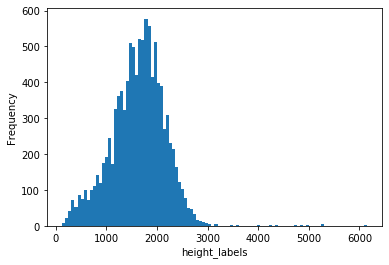

In [168]:
fig, ax = plt.subplots()
ax.hist(height_labels, bin_edges, cumulative=False)
ax.set_xlabel('height_labels')
ax.set_ylabel('Frequency')
plt.show()

In [183]:
obrub_max_h = [height_labels[i] > 3000 or height_labels[i] < 300 for i in range(len(height_labels))]
sum(obrub_max_h)

106

In [170]:
obrub_min_h = height_labels < 300
sum(obrub_min_h)

58

In [171]:
hist, bin_edges = np.histogram(width_labels, bins=100)

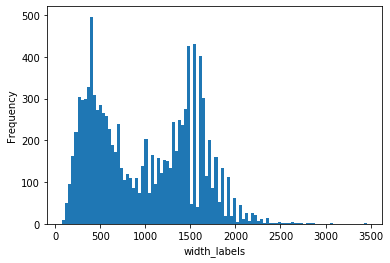

In [172]:
fig, ax = plt.subplots()
ax.hist(width_labels, bin_edges, cumulative=False)
ax.set_xlabel('width_labels')
ax.set_ylabel('Frequency')
plt.show()

In [174]:
obrub_max_w = width_labels > 2000
sum(obrub_max_w)

213

In [176]:
obrub_min_w = width_labels < 100
sum(obrub_min_w)

4

In [190]:
fin_obrub_h = [height_labels[i] < 3000 and height_labels[i] > 300 for i in range(len(height_labels))]
sum(fin_obrub_h)

10510

In [191]:
fin_obrub_w = [width_labels[i] <= 2000 and width_labels[i] >= 100 for i in range(len(width_labels))]
sum(fin_obrub_w)

10399

In [200]:
fin_obrub = [(width_labels[i] <= 2049 and width_labels[i] >= 128)\
             and  (height_labels[i] <= 3008 and height_labels[i] >= 320)\
             for i in range(len(width_labels))]
sum(fin_obrub)

10342

In [201]:
size2_labels = size2_labels[fin_obrub]
size2_labels.shape

(10342, 12)

In [50]:
#size2_labels.to_csv(os.path.join(base_path, 'size2_labels.csv'), index_label=False)

##### 6.4.2. Shape size2_labels with all interesting columns #####

In [9]:
size2_labels.drop(['PH_size1','PW_size1','PH_mask_size2','PW_mask_size2','PH_mask_size1','PW_mask_size1'], axis = 1, inplace = True)

In [13]:
size2_labels.head(15)

,image_id,data_provider,isup_grade,gleason_score,PH_size2,PW_size2,128x64x0.2,128x64x0.1
0,0005f7aaab2800f6170c399693a96917,karolinska,0,0+0,1840.0,1728.0,27,29.0
1,000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0,960.0,832.0,11,14.0
2,0018ae58b01bdadc8e347995b69f99aa,radboud,4,4+4,1584.0,368.0,25,29.0
3,001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4+4,1791.0,1494.0,24,25.0
4,001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0+0,2160.0,1792.0,46,48.0
5,002a4db09dad406c85505a00fb6f6144,karolinska,0,0+0,2048.0,1494.0,28,33.0
6,003046e27c8ead3e3db155780dc5498e,karolinska,1,3+3,2064.0,1472.0,26,30.0
7,0032bfa835ce0f43a92ae0bbab6871cb,karolinska,1,3+3,1756.0,1494.0,14,17.0
8,003a91841da04a5a31f808fb5c21538a,karolinska,1,3+3,996.0,628.0,8,12.0
9,003d4dd6bd61221ebc0bfb9350db333f,karolinska,1,3+3,1984.0,1408.0,26,30.0


In [8]:
size2_labels.shape

(10342, 8)

In [11]:
#size2_labels['64x32x0.5'] = None
#size2_labels['64x64x0.4'] = None
#size2_labels['128x64x0.2'] = None
#size2_labels['128x64x0.1'] = None

In [9]:
%%time
faults128x64x01, tiled_images128x64x01 = el_white_area(from_path = train_size2,
                                    save_fold_name = 'train_nwh_new128x64',
                                    df_name = size2_labels,
                                    tile_square_yside = 128, 
                                    tile_square_xside = 64, 
                                    tile_fill = 0.1,
                                    threshold = 241)


CPU times: user 14min 5s, sys: 44.2 s, total: 14min 49s
Wall time: 15min 45s


In [10]:
print(len(faults128x64x01))
print(tiled_images128x64x01.nbytes)

0
82736


In [22]:
tt = np.array(size2_labels['128x64x0.1'])

In [24]:
np.unique(tt)
#tt.unique()

array([ 0.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 74., 75., 76., 79., 80., 81.,
       84., 93., 94., 99.])

In [26]:
sum(tt >= 12)

9762

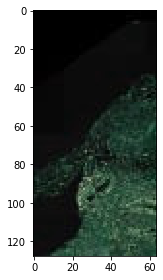

In [48]:
skimage.io.imshow(cv2.bitwise_not(tiled_images128x64x01[100][1])) 

In [43]:
train_labels[['image_id','isup_grade']].groupby('isup_grade').count()

,image_id
isup_grade,
0,2892
1,2666
2,1343
3,1242
4,1249
5,1224


In [ ]:
%%time
faults64x64x04, tiled_images64x64x04 = el_white_area(from_path = train_size2,
                                    save_fold_name = 'train_nwh_new64x64',
                                    df_name = size2_labels,
                                    tile_square_yside = 64, 
                                    tile_square_xside = 64, 
                                    tile_fill = 0.4,
                                    threshold = 241)

In [ ]:
%%time
faults128x64x02, tiled_images128x64x02 = el_white_area(from_path = train_size2,
                                    save_fold_name = 'train_nwh_new128x64',
                                    df_name = size2_labels,
                                    tile_square_yside = 128, 
                                    tile_square_xside = 64, 
                                    tile_fill = 0.2,
                                    threshold = 241)

#### 4.4. Production ####

In [84]:
temp_df[['image_id','PH_proc_size1']].groupby('PH_proc_size1').count()

,image_id
PH_proc_size1,
0,16
160,31
320,57
480,61
640,54
800,144
960,59
1120,32
1280,27


In [77]:
temp_df[['image_id','PH_proc_size1']].groupby('PH_proc_size1').count()

,image_id
PH_proc_size1,
0,395
180,5
360,34
540,5
720,24
900,26
1080,8
1260,2
1440,1


### 7. Gleason processing ###

In [14]:
get_masked_area_for_cancer_sample(df_cancer = ddd, 
                                  gleason = 5,
                                  output_path = os.path.join(base_path, 'temp'))

NameError: name 'get_masked_area_for_cancer_sample' is not defined

In [27]:
images = [tt.split('_')[0] for tt in os.listdir(original_mask_path)]
data_sample = train_labels.loc[train_labels.image_id.isin(images)]
ddd = data_sample.loc[data_sample.isup_grade == 4]

In [29]:
images = [tt.split('_')[0] for tt in os.listdir(original_mask_path)]
data_sample = train_labels.loc[train_labels.image_id.isin(images)]
ddd = data_sample.loc[data_sample.isup_grade == 3]

In [34]:
ddd.head()

,image_id,data_provider,isup_grade,gleason_score
15,0068d4c7529e34fd4c9da863ce01a161,radboud,3,4+3
17,006f6aa35a78965c92fffd1fbd53a058,radboud,3,4+3
19,0076bcb66e46fb485f5ba432b9a1fe8a,radboud,3,4+3
26,00a7fb880dc12c5de82df39b30533da9,radboud,3,4+3
43,010f9df31ea44191c106d8226eaf46fb,karolinska,3,4+3


### CHUNKS ###

In [ ]:
#new_mask = new_mask.astype('uint8') * 255
        #gbg = cv2.cvtColor(new_mask, cv2.COLOR_BGR2GRAY)
        gbg = new_mask[:,:,2]*100
        #gbg = cv2.bitwise_not(gbg)
        ret, new_mask = cv2.threshold(gbg, 100, 255, cv2.THRESH_BINARY)
        bcontours, bhierarchy = cv2.findContours(new_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        skimage.io.imshow(cv2.drawContours(new_mask, bcontours, -1, (0,255,0), 3))

In [118]:
%%time
AA = []
for path, subdirs, files in os.walk(train_cnn):
    for name in files:
        AA.append(name)
        

CPU times: user 9.01 ms, sys: 23.9 ms, total: 32.9 ms
Wall time: 32.3 ms


In [119]:
len(AA)

7485

In [ ]:

            temp_dim = int(sqrt(all_tiles/transform_ratio))
                temp_precip.append(int(all_tiles - (temp_dim**2*temp_ratio)))
                final_ratio = transform_ratios[np.argmin(temp_precip, axis=0)]
                final_dim = int(sqrt(all_tiles/final_ratio))


            #reshape tiles array and abandon several tiles:
            nonwhite_image_tiles1 = nonwhite_image_tiles[:int(final_dim**2*final_ratio),:,:,:]
            a, b, c, d = nonwhite_image_tiles1.shape
            data_new = (nonwhite_image_tiles1.reshape(int(final_dim), int(final_dim*final_ratio),\
                                                    b, c, d).swapaxes(1,2).reshape(b*int(final_dim),\
                                                    c*int(final_dim*final_ratio), d))
            #final resize, if demanded:
            if final_resize: data_new = cv2.resize(data_new, final_size)

            #write on the disk:
            cv2.imwrite(save_path, data_new, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
            #cv2.imwrite(save_path, data_new, [int(cv2.IMWRITE_PNG_COMPRESSION), compression])
            #skimage.io.imshow(data_new[1000:1600, 1200:1400])
            # collect garbage:
            del biopsy, nonwhite_image_tiles, nonwhite_image_tiles1, temp_precip
            gc.collect()

            # write relative square metadata:        
            if write_metadata_to_df: 
                rs_metadata_arr.append((1 -(np.sum(np.array(white_mask)))/(white_mask.shape[0]*\
                                                                    white_mask.shape[1]*255))*10000//100/100)
                size_metadata_arr.append((grey_biopsy.shape, data_new.shape))
                tiles_metadata_arr.append((ytiles, xtiles, int(final_dim)*int(final_ratio*final_dim),\
                                           all_tiles/tiles_number*10000//100/100,\
                                            final_ratio ))

            # collect garbage:
            del grey_biopsy, ret, white_mask, data_new
            gc.collect()
        

In [284]:
#size2_labels.drop(['128x64x0.25'], axis =1, inplace = True)
#size2_labels['128x64x0.2']=None

### Repeat best tiling kernels ###

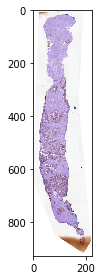

In [19]:
test_im = os.path.join(train_size2, '19963a5a3c42675307056e0be36851cf.jpg')
biopsy =  skimage.io.imread(test_im) #MultiImage(test_mask)[1]
skimage.io.imshow(biopsy[:,:,:]) 

In [62]:
biopsy[500, 100]

array([160, 138, 176], dtype=uint8)

In [ ]:
def get_axis_max_min(array, axis=0):
    one_axis = list((array != 255).sum(axis=tuple([x for x in (0, 1, 2) if x != axis])))
    axis_min = next((i for i, x in enumerate(one_axis) if x), 0)
    axis_max = len(one_axis) - next((i for i, x in enumerate(one_axis[::-1]) if x), 0)
    return axis_min, axis_max

In [26]:
biopsy.shape

(928, 224, 3)

In [ ]:
list((array != 255).sum(axis=tuple([x for x in (0, 1, 2) if x != axis])))

In [22]:
axis = 0
one_axis = list((biopsy != 255).sum(axis=tuple([x for x in (0, 1, 2) if x != axis])))
    

In [27]:
axis_min = next((i for i, x in enumerate(one_axis) if x), 0)

In [28]:
type(axis_min)

int

In [35]:
axis_max = len(one_axis) - next((i for i, x in enumerate(one_axis[::-1]) if x), 0)

In [36]:
axis_max

928

In [47]:
tt = train_labels[10:20].isup_grade.values

In [50]:
pp = train_labels['isup_grade'].value_counts()

In [59]:
pp

0    2892
1    2666
2    1343
4    1249
3    1242
5    1224
Name: isup_grade, dtype: int64

In [52]:
type(pp)

pandas.core.series.Series

In [57]:
class_weights = {i: max(pp)/ v  for i, v in pp.items()}

In [58]:
class_weights 

{0: 1.0,
 1: 1.0847711927981996,
 2: 2.1533879374534624,
 4: 2.3154523618895118,
 3: 2.3285024154589373,
 5: 2.3627450980392157}